# 라이브러리 로드

21.12.27 

21.12.28 7번부터

In [1]:
# pandas, seaborn, numpy, matplotlib.pyplot, matplotlib, folium 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as ml
import seaborn as sns
import folium as fm

In [2]:
# 버전확인하기

print(pd.__version__)
print(sns.__version__)
print(fm.__version__)

1.3.4
0.11.2
0.12.1.post1


In [3]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요. 
# !pip install seaborn --upgrade

## 데이터셋 불러오기

In [4]:
# df url로 직접 불러와도 상관없다.
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_oitems = pd.read_csv("olist_order_items_dataset.csv")
df_opay = pd.read_csv("olist_order_payments_dataset.csv")
df_prod = pd.read_csv("olist_products_dataset.csv")
df_cus = pd.read_csv("olist_customers_dataset.csv")
df_rev = pd.read_csv("olist_order_reviews_dataset.csv")

df_geo = pd.read_csv("5_geolocation_dataset.csv")
# df_sel = pd.read_csv("6_sellers.csv")

df_trans_category = pd.read_csv("product_category_name_translation.csv")

df_oitempp = pd.read_csv("1_orders_items_prod_pay.csv")
df_scdpay = pd.read_csv("3_sel-cus-distance-pay.csv")
df_scdprice = pd.read_csv("4_sel-cus-distance-time-price.csv")
df_selocus = pd.read_csv("2_sel_ord_cus.csv")


### 데이터셋 살펴보기

In [4]:
df_trans_category.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [5]:
df_geo.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                716685
geolocation_lng                717097
geolocation_city                 5960
geolocation_state                  27
FALSE=0                             1
dtype: int64

In [6]:
df_cus.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [7]:
df_sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                609
seller_state                23
dtype: int64

### 데이터셋 일부만 가져오기

In [6]:
# head
df_sel.head()

,SELLER_ID,STATE,SELLER_ZIP_CODE_PREFIX,CITY,Unnamed: 4
0,8602a61d680a10a82cceeeda0d99ea3d,SP,1001,sao paulo,NaN
1,8602a61d680a10a82cceeeda0d99ea3d,SP,1001,sao paulo,NaN
2,8602a61d680a10a82cceeeda0d99ea3d,SP,1001,sao paulo,NaN
3,f1fd5ab1181f827ffad998c1a5de7d74,PR,80010,curitiba,NaN
4,381c83fdca332ea6afd896da20bf6e4a,PR,80010,curitiba,NaN


In [15]:
# tail
df_geo.tail(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,FALSE=0
1048572,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN


### 요약하기

In [9]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  float64
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
 5   FALSE=0                      1000162 non-null  float64
dtypes: float64(4), object(2)
memory usage: 48.0+ MB


In [10]:
df_geo.isna().sum()

geolocation_zip_code_prefix    48412
geolocation_lat                48412
geolocation_lng                48412
geolocation_city               48412
geolocation_state              48412
FALSE=0                        48413
dtype: int64

In [11]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### category에 cool_stuff는 뭐야?

In [49]:
df_prod.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [55]:
cool_stuffs = df_prod[(df_prod["product_category_name"]=='cool_stuff')]
cool_stuffs

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
44,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0
46,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0
51,b5cfb1d3c5e435a7a52227e08f220ee7,cool_stuff,55.0,410.0,2.0,1300.0,36.0,16.0,24.0
57,fdeb34a9f03fea7c3937dd62d1d0287e,cool_stuff,58.0,1252.0,1.0,1100.0,30.0,20.0,23.0
...,...,...,...,...,...,...,...,...,...
32713,b137e6107ce304cd87ee01233582603d,cool_stuff,46.0,1243.0,1.0,1200.0,40.0,40.0,30.0
32747,8300e0e22bb50df7bc0bbe0b2b15997b,cool_stuff,53.0,956.0,1.0,475.0,33.0,15.0,33.0
32892,cd96152f38323aa8177e3a72d6558518,cool_stuff,37.0,510.0,1.0,1367.0,28.0,25.0,33.0
32897,ae7937db16790e94d48df1991877b508,cool_stuff,58.0,860.0,3.0,400.0,16.0,10.0,12.0


In [56]:
cool_stuffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 6 to 32931
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  789 non-null    object 
 1   product_category_name       789 non-null    object 
 2   product_name_lenght         789 non-null    float64
 3   product_description_lenght  789 non-null    float64
 4   product_photos_qty          789 non-null    float64
 5   product_weight_g            789 non-null    float64
 6   product_length_cm           789 non-null    float64
 7   product_height_cm           789 non-null    float64
 8   product_width_cm            789 non-null    float64
dtypes: float64(7), object(2)
memory usage: 61.6+ KB


In [58]:
df_oitempp.columns

Index(['ORDER_ID', 'CUSTOMER_ID', 'STATUS', 'PURCHASE_TIMESTAMP',
       'APPROVED_AT', 'DELIV_CARRIER_DATE', 'DELIV_CUSTOMER_DATE',
       'ESTIMATED_DELIV', 'SELLER_ID', 'PRODUCT_ID', 'CATEGORY', 'PRICE',
       'ORDER_ID_1', 'PAYMENT_SEQUENTIAL', 'PAYMENT_TYPE',
       'PAYMENT_INSTALLMENTS', 'PAYMENT_VALUE'],
      dtype='object')

In [59]:
cool_stuffs_sellers = pd.merge(cool_stuffs, df_oitempp, how='left', left_on='product_id', right_on='PRODUCT_ID')
cool_stuffs_sellers

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,ORDER_ID,...,ESTIMATED_DELIV,SELLER_ID,PRODUCT_ID,CATEGORY,PRICE,ORDER_ID_1,PAYMENT_SEQUENTIAL,PAYMENT_TYPE,PAYMENT_INSTALLMENTS,PAYMENT_VALUE
0,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,c6343db6c1801f9c3301166f02931116,...,2018-01-03 00:00:00,8b8cfc8305aa441e4239358c9f6f2485,732bd381ad09e530fe0a5f457d81becb,cool_stuff,968.00,c6343db6c1801f9c3301166f02931116,1,credit_card,1,1012.30
1,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,9632facd8bd95315d63a23bf616d85b0,...,2018-02-07 00:00:00,8b8cfc8305aa441e4239358c9f6f2485,732bd381ad09e530fe0a5f457d81becb,cool_stuff,958.00,9632facd8bd95315d63a23bf616d85b0,1,credit_card,5,985.76
2,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0,39fe0331a8d6ca0adba8a1436dc1e8e3,...,2017-05-04 00:00:00,7299e27ed73d2ad986de7f7c77d919fa,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,379.99,39fe0331a8d6ca0adba8a1436dc1e8e3,1,credit_card,8,400.93
3,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0,9b05e5be44c83c64626fb21d4bba7118,...,2017-12-04 00:00:00,7299e27ed73d2ad986de7f7c77d919fa,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,559.99,9b05e5be44c83c64626fb21d4bba7118,1,credit_card,10,604.30
4,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0,87680c5e6ba498472b6478862b55f883,...,2017-06-08 00:00:00,834f3294fba9f932f56edc879193f925,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,572.00,87680c5e6ba498472b6478862b55f883,1,boleto,1,644.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,40.0,1516.0,2.0,800.0,22.0,15.0,27.0,638a540852799faabe1c7c5647646c4e,...,2017-05-24 00:00:00,59fb871bf6f4522a87ba567b42dafecf,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,119.99,638a540852799faabe1c7c5647646c4e,1,credit_card,2,136.04
3983,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,40.0,1516.0,2.0,800.0,22.0,15.0,27.0,d7bd9020e0a2758aef0994ea533ee928,...,2017-06-12 00:00:00,59fb871bf6f4522a87ba567b42dafecf,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,119.99,d7bd9020e0a2758aef0994ea533ee928,1,credit_card,3,146.08
3984,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,40.0,1516.0,2.0,800.0,22.0,15.0,27.0,9a5d120ae552d50b367cad2bbd87caa0,...,2017-06-12 00:00:00,59fb871bf6f4522a87ba567b42dafecf,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,119.99,9a5d120ae552d50b367cad2bbd87caa0,1,credit_card,3,286.30
3985,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,40.0,1516.0,2.0,800.0,22.0,15.0,27.0,9a5d120ae552d50b367cad2bbd87caa0,...,2017-06-12 00:00:00,59fb871bf6f4522a87ba567b42dafecf,9ce4603565c839785b24a7e95e28f4eb,cool_stuff,119.99,9a5d120ae552d50b367cad2bbd87caa0,1,credit_card,3,286.30


In [60]:
cool_stuffs_sellers.drop_duplicates(['product_id'], keep='first', inplace=True, ignore_index=False)
cool_stuffs_sellers

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,ORDER_ID,...,ESTIMATED_DELIV,SELLER_ID,PRODUCT_ID,CATEGORY,PRICE,ORDER_ID_1,PAYMENT_SEQUENTIAL,PAYMENT_TYPE,PAYMENT_INSTALLMENTS,PAYMENT_VALUE
0,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,c6343db6c1801f9c3301166f02931116,...,2018-01-03 00:00:00,8b8cfc8305aa441e4239358c9f6f2485,732bd381ad09e530fe0a5f457d81becb,cool_stuff,968.00,c6343db6c1801f9c3301166f02931116,1,credit_card,1,1012.30
2,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0,39fe0331a8d6ca0adba8a1436dc1e8e3,...,2017-05-04 00:00:00,7299e27ed73d2ad986de7f7c77d919fa,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,379.99,39fe0331a8d6ca0adba8a1436dc1e8e3,1,credit_card,8,400.93
4,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0,87680c5e6ba498472b6478862b55f883,...,2017-06-08 00:00:00,834f3294fba9f932f56edc879193f925,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,572.00,87680c5e6ba498472b6478862b55f883,1,boleto,1,644.15
67,b5cfb1d3c5e435a7a52227e08f220ee7,cool_stuff,55.0,410.0,2.0,1300.0,36.0,16.0,24.0,9edb5899606254447166a651aa65c063,...,2018-03-09 00:00:00,4b9750c8ad28220fe6702d4ecb7c898f,b5cfb1d3c5e435a7a52227e08f220ee7,cool_stuff,49.90,9edb5899606254447166a651aa65c063,1,credit_card,1,62.13
68,fdeb34a9f03fea7c3937dd62d1d0287e,cool_stuff,58.0,1252.0,1.0,1100.0,30.0,20.0,23.0,5ee987cdf0ab5a1b320bbfae52b39661,...,2017-03-29 00:00:00,d66c305afaec317ebee552073a674429,fdeb34a9f03fea7c3937dd62d1d0287e,cool_stuff,53.90,5ee987cdf0ab5a1b320bbfae52b39661,1,boleto,1,72.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,b137e6107ce304cd87ee01233582603d,cool_stuff,46.0,1243.0,1.0,1200.0,40.0,40.0,30.0,dc0b827df3db237adaa4fb6c4a770096,...,2017-10-23 00:00:00,7a67c85e85bb2ce8582c35f2203ad736,b137e6107ce304cd87ee01233582603d,cool_stuff,59.99,dc0b827df3db237adaa4fb6c4a770096,1,credit_card,1,71.72
3965,8300e0e22bb50df7bc0bbe0b2b15997b,cool_stuff,53.0,956.0,1.0,475.0,33.0,15.0,33.0,7e666050aebcbd6feba9622558222157,...,2017-11-17 00:00:00,f3da5b2ff499efb8d4a6d371d175d7dd,8300e0e22bb50df7bc0bbe0b2b15997b,cool_stuff,50.34,7e666050aebcbd6feba9622558222157,1,credit_card,2,58.12
3970,cd96152f38323aa8177e3a72d6558518,cool_stuff,37.0,510.0,1.0,1367.0,28.0,25.0,33.0,4023a76299303d17458bcb9419d0f6e6,...,2017-09-26 00:00:00,e333046ce6517bd8bb510291d44f0130,cd96152f38323aa8177e3a72d6558518,cool_stuff,129.00,4023a76299303d17458bcb9419d0f6e6,1,credit_card,8,145.53
3972,ae7937db16790e94d48df1991877b508,cool_stuff,58.0,860.0,3.0,400.0,16.0,10.0,12.0,556b30ae47829a82927b5dff9ca2ba65,...,2018-03-09 00:00:00,fcb5ace8bcc92f75707dc0f01a27d269,ae7937db16790e94d48df1991877b508,cool_stuff,71.10,556b30ae47829a82927b5dff9ca2ba65,1,credit_card,1,78.88


In [61]:
cool_stuffs_sellers.nunique()

product_id                    789
product_category_name           1
product_name_lenght            48
product_description_lenght    551
product_photos_qty             11
product_weight_g              268
product_length_cm              72
product_height_cm              69
product_width_cm               55
ORDER_ID                      788
CUSTOMER_ID                   788
STATUS                          6
PURCHASE_TIMESTAMP            788
APPROVED_AT                   788
DELIV_CARRIER_DATE            770
DELIV_CUSTOMER_DATE           764
ESTIMATED_DELIV               322
SELLER_ID                     246
PRODUCT_ID                    789
CATEGORY                        1
PRICE                         395
ORDER_ID_1                    788
PAYMENT_SEQUENTIAL              3
PAYMENT_TYPE                    4
PAYMENT_INSTALLMENTS           13
PAYMENT_VALUE                 733
dtype: int64

##  결측치 보기

In [6]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [7]:
df_cus.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### (import 후 여기부터)df_geo null값 지우기

In [5]:
df_geo.dropna(inplace=True)

In [6]:
df_geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
FALSE=0                        0
dtype: int64

In [7]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000162 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000162 non-null  float64
 1   geolocation_lat              1000162 non-null  float64
 2   geolocation_lng              1000162 non-null  float64
 3   geolocation_city             1000162 non-null  object 
 4   geolocation_state            1000162 non-null  object 
 5   FALSE=0                      1000162 non-null  float64
dtypes: float64(4), object(2)
memory usage: 53.4+ MB


# sellers 테이블 도시 수정하여 여기서 새로만들기

In [8]:
df_geo.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
FALSE=0                        0
dtype: int64

<AxesSubplot:>

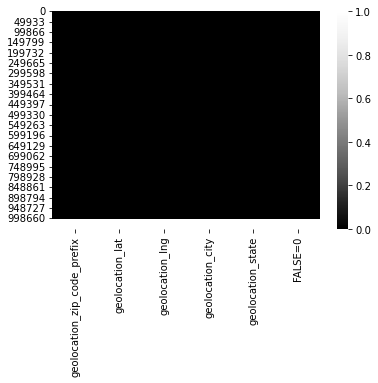

In [13]:
# "히트맵으로 해보세요." True와 False이기 때문에 이렇게 나타납니다.
# sns.heatmap(df_geo.isnull(), cmap="Greys_r")

구매내역 같은 시계열 데이터의 경우, 


비회원 구매가 많을 때 이런 히트맵들을 활용해서 확인할 수 있다!

### describe()

In [9]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기
df_geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,FALSE=0
count,1.000162e+06,1.000162e+06,1.000162e+06,1000162.0
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,1.0
std,3.054935e+04,5.715869e+00,4.269749e+00,0.0
min,1.001000e+03,-3.660537e+01,-1.014668e+02,1.0
25%,1.107500e+04,-2.360355e+01,-4.857319e+01,1.0
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,1.0
75%,6.350400e+04,-1.997962e+01,-4.376774e+01,1.0
max,9.999000e+04,4.506593e+01,1.211054e+02,1.0


In [10]:
df_sellers.describe(include="object")

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,609,23
top,8602a61d680a10a82cceeeda0d99ea3d,sao paulo,SP
freq,1,696,1849


## sellers 테이블과 geo 테이블 연결
### 연결 후 테이블 하나로 만들기

In [11]:
# nunique 값 구하기

df_sellers.nunique()
# 유일값을 의미한다. 그러나 수치형 범주형을 다 뜻한다. 히스토그램 했을을때 이가 비어있던 값들! 실린더와 모델년식은 범주형 변수에 더 가깝다.

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                609
seller_state                23
dtype: int64

In [12]:
df_geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'FALSE=0'],
      dtype='object')

### sellers 테이블에 지역 연결 (merge)

In [13]:
# pd.merge()

# merge_outer = pd.merge(df1,df2, how='outer',on='id')
# merge_outer

# merge_left = pd.merge(df1,df2, how='left', left_on='stock_name', right_on='name')
# merge_left

# https://yganalyst.github.io/data_handling/Pd_12/


In [14]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [15]:
df_sel_merge_geo = pd.merge(df_sellers, df_geo, how='left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df_sel_merge_geo

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,FALSE=0
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP,1001.0,-23.549779,-46.633957,sao paulo,SP,1.0
1,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP,1001.0,-23.550263,-46.634196,sao paulo,SP,1.0
2,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP,1001.0,-23.549951,-46.634027,sao paulo,SP,1.0
3,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP,1001.0,-23.549292,-46.633559,sao paulo,SP,1.0
4,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP,1001.0,-23.550498,-46.634338,sao paulo,SP,1.0
...,...,...,...,...,...,...,...,...,...,...
435089,d1c7fa84e48cfa21a0e595167c1c500e,99730,jacutinga,RS,99730.0,-27.726741,-52.538420,jacutinga,RS,1.0
435090,d1c7fa84e48cfa21a0e595167c1c500e,99730,jacutinga,RS,99730.0,-27.729373,-52.537491,jacutinga,RS,1.0
435091,d1c7fa84e48cfa21a0e595167c1c500e,99730,jacutinga,RS,99730.0,-27.729782,-52.533930,jacutinga,RS,1.0
435092,d1c7fa84e48cfa21a0e595167c1c500e,99730,jacutinga,RS,99730.0,-27.727540,-52.539263,jacutinga,RS,1.0


### 결합으로 인한 중복값제거 (drop_dupricates)

In [16]:
# 중복값 제거
df_sel_merge_geo.drop_duplicates(['seller_id'], keep='first', inplace=True, ignore_index=False)
df_sel_merge_geo

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,FALSE=0
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP,1001.0,-23.549779,-46.633957,sao paulo,SP,1.0
26,e0487761face83d64fcada2408959a36,1021,sao paulo,SP,1021.0,-23.544185,-46.632644,sao paulo,SP,1.0
49,dd55f1bb788714a40e7954c3be6df745,1021,sao paulo,SP,1021.0,-23.544185,-46.632644,sao paulo,SP,1.0
72,09bad886111255c5b5030314fc7f1a4a,1022,sao paulo,SP,1022.0,-23.544715,-46.633164,sao paulo,SP,1.0
89,f049a72cf58fd31b11f8919cade515e7,1023,sao paulo,SP,1023.0,-23.544176,-46.632173,sao paulo,SP,1.0
...,...,...,...,...,...,...,...,...,...,...
434122,447d377bdb757058acb569025ee18a93,99500,carazinho,RS,99500.0,-28.289446,-52.794123,carazinho,RS,1.0
434427,b1a81260566c1bac3114a6d124413f27,99500,carazinho,RS,99500.0,-28.289446,-52.794123,carazinho,RS,1.0
434732,4fae87d32467e18eb46e4a76a0a0b9ce,99670,ronda alta,RS,99670.0,-27.783656,-52.807832,ronda alta,RS,1.0
434771,968ee78631915a63fef426d6733d7422,99700,erechim,RS,99700.0,-27.634768,-52.280294,erechim,RS,1.0


In [17]:
df_sel_merge_geo.isna().sum()

seller_id                      0
seller_zip_code_prefix         0
seller_city                    0
seller_state                   0
geolocation_zip_code_prefix    7
geolocation_lat                7
geolocation_lng                7
geolocation_city               7
geolocation_state              7
FALSE=0                        7
dtype: int64

In [18]:
df_sel_merge_geo["seller_city"].isnull

<bound method Series.isnull of 0          sao paulo
26         sao paulo
49         sao paulo
72         sao paulo
89         sao paulo
             ...    
434122     carazinho
434427     carazinho
434732    ronda alta
434771       erechim
435085     jacutinga
Name: seller_city, Length: 3095, dtype: object>

### geolocation에 집코드가 없는 아이들이 있다.

### 컬럼 정리 (drop, 이름 재정의, 순서변경)

In [19]:
# 컬럼 정리하기
# df = df.drop(columns=['col1', 'col2'], axis=1)

df_sel_geo = df_sel_merge_geo.drop(columns=['seller_city','seller_state','FALSE=0','geolocation_zip_code_prefix'])
df_sel_geo

,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,8602a61d680a10a82cceeeda0d99ea3d,1001,-23.549779,-46.633957,sao paulo,SP
26,e0487761face83d64fcada2408959a36,1021,-23.544185,-46.632644,sao paulo,SP
49,dd55f1bb788714a40e7954c3be6df745,1021,-23.544185,-46.632644,sao paulo,SP
72,09bad886111255c5b5030314fc7f1a4a,1022,-23.544715,-46.633164,sao paulo,SP
89,f049a72cf58fd31b11f8919cade515e7,1023,-23.544176,-46.632173,sao paulo,SP
...,...,...,...,...,...,...
434122,447d377bdb757058acb569025ee18a93,99500,-28.289446,-52.794123,carazinho,RS
434427,b1a81260566c1bac3114a6d124413f27,99500,-28.289446,-52.794123,carazinho,RS
434732,4fae87d32467e18eb46e4a76a0a0b9ce,99670,-27.783656,-52.807832,ronda alta,RS
434771,968ee78631915a63fef426d6733d7422,99700,-27.634768,-52.280294,erechim,RS


In [20]:
# 이름 정리를 위해 컬럼 출력

df_sel_geo.columns

Index(['seller_id', 'seller_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [21]:
# 이름 정리
# https://hogni.tistory.com/51
# df.rename(columns={'Before':'After'})
# 혹은
# df.columns = ['', '', '']
df_sel_geo.columns = ['seller_id', 'seller_zip_code', 'seller_lat', 'seller_lng', 'seller_city', 'seller_state']
df_sel_geo

,seller_id,seller_zip_code,seller_lat,seller_lng,seller_city,seller_state
0,8602a61d680a10a82cceeeda0d99ea3d,1001,-23.549779,-46.633957,sao paulo,SP
26,e0487761face83d64fcada2408959a36,1021,-23.544185,-46.632644,sao paulo,SP
49,dd55f1bb788714a40e7954c3be6df745,1021,-23.544185,-46.632644,sao paulo,SP
72,09bad886111255c5b5030314fc7f1a4a,1022,-23.544715,-46.633164,sao paulo,SP
89,f049a72cf58fd31b11f8919cade515e7,1023,-23.544176,-46.632173,sao paulo,SP
...,...,...,...,...,...,...
434122,447d377bdb757058acb569025ee18a93,99500,-28.289446,-52.794123,carazinho,RS
434427,b1a81260566c1bac3114a6d124413f27,99500,-28.289446,-52.794123,carazinho,RS
434732,4fae87d32467e18eb46e4a76a0a0b9ce,99670,-27.783656,-52.807832,ronda alta,RS
434771,968ee78631915a63fef426d6733d7422,99700,-27.634768,-52.280294,erechim,RS


In [22]:
# 컬럼 순서 정리: 대괄호 [ ] 안에 원하는 순서에 맞게 컬럼 이름이 정리된 리스트를 전달

df_sel_geo = df_sel_geo[['seller_id', 'seller_zip_code', 'seller_city', 'seller_state', 'seller_lat', 'seller_lng']]
df_sel_geo

,seller_id,seller_zip_code,seller_city,seller_state,seller_lat,seller_lng
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP,-23.549779,-46.633957
26,e0487761face83d64fcada2408959a36,1021,sao paulo,SP,-23.544185,-46.632644
49,dd55f1bb788714a40e7954c3be6df745,1021,sao paulo,SP,-23.544185,-46.632644
72,09bad886111255c5b5030314fc7f1a4a,1022,sao paulo,SP,-23.544715,-46.633164
89,f049a72cf58fd31b11f8919cade515e7,1023,sao paulo,SP,-23.544176,-46.632173
...,...,...,...,...,...,...
434122,447d377bdb757058acb569025ee18a93,99500,carazinho,RS,-28.289446,-52.794123
434427,b1a81260566c1bac3114a6d124413f27,99500,carazinho,RS,-28.289446,-52.794123
434732,4fae87d32467e18eb46e4a76a0a0b9ce,99670,ronda alta,RS,-27.783656,-52.807832
434771,968ee78631915a63fef426d6733d7422,99700,erechim,RS,-27.634768,-52.280294


In [23]:
df_sel_geo.isna().sum()

seller_id          0
seller_zip_code    0
seller_city        7
seller_state       7
seller_lat         7
seller_lng         7
dtype: int64

In [24]:
df_sel_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 435085
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seller_id        3095 non-null   object 
 1   seller_zip_code  3095 non-null   int64  
 2   seller_city      3088 non-null   object 
 3   seller_state     3088 non-null   object 
 4   seller_lat       3088 non-null   float64
 5   seller_lng       3088 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 169.3+ KB


['seller_id', 'seller_zip_code', 'seller_city', 'seller_state', 'seller_lat', 'seller_lng']


로 이루어진 df_sel_geo 데이터셋 완성

### countplot으로 city 주별 빈도수 시각화

<AxesSubplot:xlabel='seller_city', ylabel='count'>

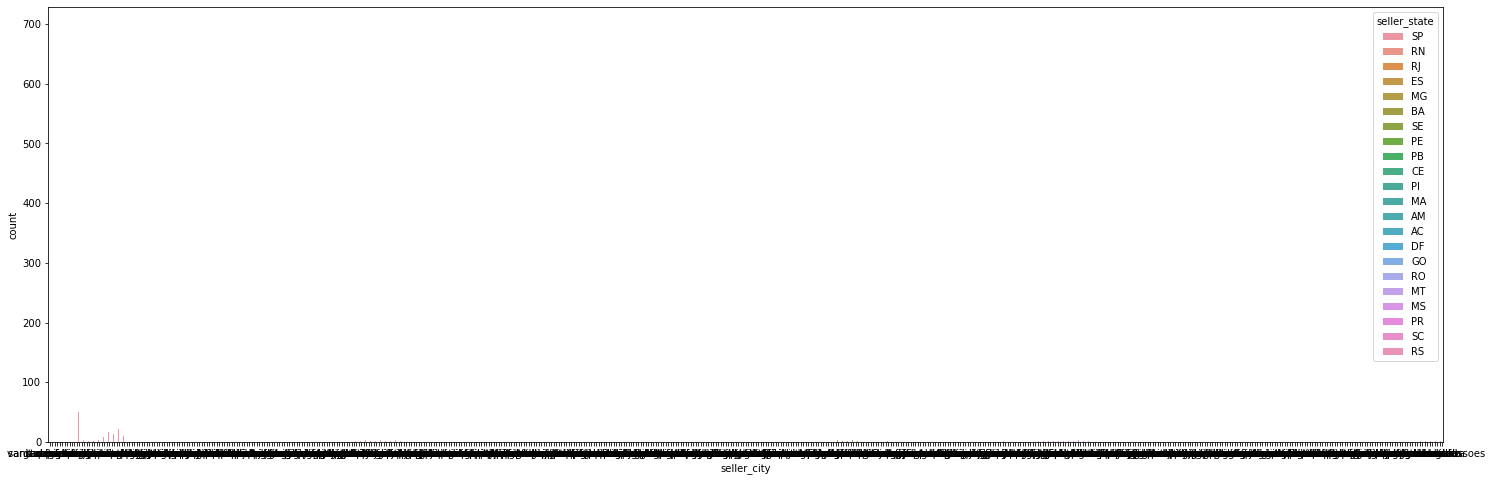

In [31]:
# countplot 으로 city 빈도수 시각화 하기
plt.figure(figsize = (25,8))
sns.countplot(data=df_sel_geo, x="seller_city", hue="seller_state")
# y에 origin을 넣어도 된다. 둘 중 하나만 넣으면 알아서 빈도수를 시각화해준다.

<AxesSubplot:xlabel='count', ylabel='seller_state'>

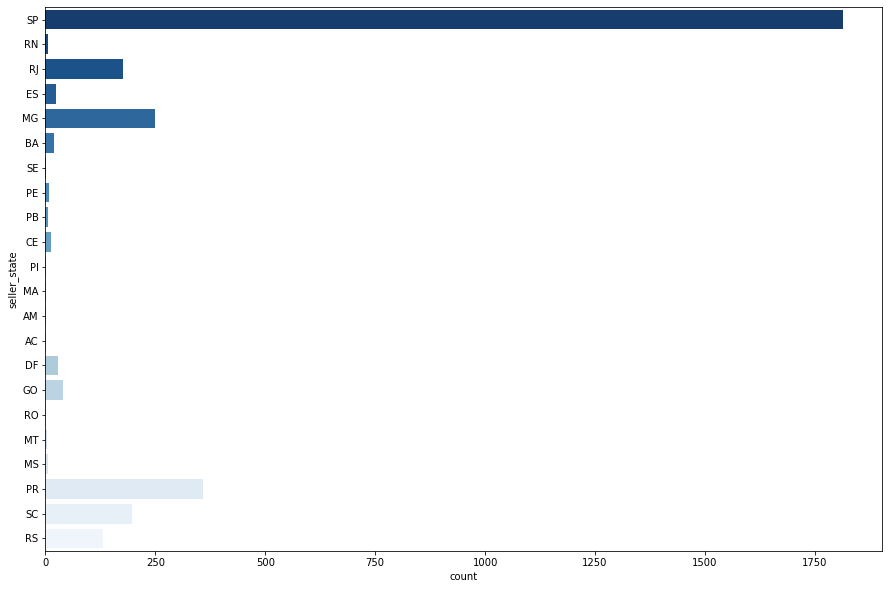

In [54]:
# countplot 으로 state 빈도수 시각화 하기
plt.figure(figsize = (15,10))
sns.countplot(data=df_sel_geo, y="seller_state" , palette='Blues_r')

In [55]:
# 사이즈 변경하기 질문이에요옹 + barplot 으로 합계 값 구하기 
# df.hist(figsize=(12,6), bins =50) 
# sns.barplot(data=df, x="origin", y="mpg", ci=None)
# df_sel_geo.hist()

## customers 테이블과 geo 테이블 연결

### customers테이블 city 수 확인 (오류 확인)

In [25]:
df_geo.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                716684
geolocation_lng                717096
geolocation_city                 5960
geolocation_state                  27
FALSE=0                             1
dtype: int64

In [26]:
df_cus.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [27]:
df_cus.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

city수도 넘지 않고 state 수 도 같다.

### customers테이블 도시 수정하기

혹시나 모르니 geo 테이블로 연결하여 수정한다.

In [28]:
# 연결하기

df_cus_merge_geo = pd.merge(df_cus, df_geo, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df_cus_merge_geo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,FALSE=0
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509898,-47.397866,franca,SP,1.0
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP,1.0
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP,1.0
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP,1.0
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15083728,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.599369,-46.905603,cotia,SP,1.0
15083729,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.593577,-46.910112,cotia,SP,1.0
15083730,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.584425,-46.892014,cotia,SP,1.0
15083731,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.595022,-46.918546,cotia,SP,1.0


In [29]:
# 중복값 제거

df_cus_merge_geo.drop_duplicates(['customer_id'], keep='first', inplace=True, ignore_index=False)
df_cus_merge_geo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,FALSE=0
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509898,-47.397866,franca,SP,1.0
147,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.733175,-46.535652,sao bernardo do campo,SP,1.0
325,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.530052,-46.657755,sao paulo,SP,1.0
428,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.496930,-46.185352,mogi das cruzes,SP,1.0
561,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.987222,-47.151073,campinas,SP,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15083045,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937.0,-23.587901,-46.501830,sao paulo,SP,1.0
15083094,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764.0,-23.614793,-46.769430,taboao da serra,SP,1.0
15083305,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115.0,-3.744128,-38.510859,fortaleza,CE,1.0
15083462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120.0,-29.956391,-51.167614,canoas,RS,1.0


In [30]:
# 잘 되었나?
df_cus_merge_geo.info()

# 로우수가 같으니 잘 되었다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 15083599
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_city                99441 non-null  object 
 4   customer_state               99441 non-null  object 
 5   geolocation_zip_code_prefix  99163 non-null  float64
 6   geolocation_lat              99163 non-null  float64
 7   geolocation_lng              99163 non-null  float64
 8   geolocation_city             99163 non-null  object 
 9   geolocation_state            99163 non-null  object 
 10  FALSE=0                      99163 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


### df_cus_merge_geo 에도 몇명은 geo에서 zip code를 찾을 수 없다.

In [31]:
df_cus_merge_geo.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
geolocation_city               278
geolocation_state              278
FALSE=0                        278
dtype: int64

### 컬럼 정리

In [32]:
# 이름 정리를 위해 컬럼 출력

df_cus_merge_geo.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'FALSE=0'],
      dtype='object')

In [33]:
# 컬럼 정리
df_cus_geo = df_cus_merge_geo.drop(columns=['customer_city','customer_state','FALSE=0','geolocation_zip_code_prefix'])
df_cus_geo

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509898,-47.397866,franca,SP
147,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.733175,-46.535652,sao bernardo do campo,SP
325,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.530052,-46.657755,sao paulo,SP
428,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.496930,-46.185352,mogi das cruzes,SP
561,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.987222,-47.151073,campinas,SP
...,...,...,...,...,...,...,...
15083045,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,-23.587901,-46.501830,sao paulo,SP
15083094,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,-23.614793,-46.769430,taboao da serra,SP
15083305,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,-3.744128,-38.510859,fortaleza,CE
15083462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,-29.956391,-51.167614,canoas,RS


In [34]:
# 이름 재정의

df_cus_geo.columns = ['customer_id','customer_unique_id', 'customer_zip_code', 'customer_lat', 'customer_lng', 'customer_city', 'customer_state']
df_cus_geo

,customer_id,customer_unique_id,customer_zip_code,customer_lat,customer_lng,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509898,-47.397866,franca,SP
147,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.733175,-46.535652,sao bernardo do campo,SP
325,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.530052,-46.657755,sao paulo,SP
428,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.496930,-46.185352,mogi das cruzes,SP
561,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.987222,-47.151073,campinas,SP
...,...,...,...,...,...,...,...
15083045,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,-23.587901,-46.501830,sao paulo,SP
15083094,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,-23.614793,-46.769430,taboao da serra,SP
15083305,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,-3.744128,-38.510859,fortaleza,CE
15083462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,-29.956391,-51.167614,canoas,RS


In [35]:
# 컬럼 순서 변경

df_cus_geo = df_cus_geo[['customer_id','customer_unique_id', 'customer_zip_code', 'customer_city', 'customer_state', 'customer_lat', 'customer_lng']]
df_cus_geo

,customer_id,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866
147,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.733175,-46.535652
325,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.530052,-46.657755
428,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
561,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073
...,...,...,...,...,...,...,...
15083045,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830
15083094,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.614793,-46.769430
15083305,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859
15083462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614


### 결측값 확인하기

In [36]:
df_cus_geo.isna().sum()

customer_id             0
customer_unique_id      0
customer_zip_code       0
customer_city         278
customer_state        278
customer_lat          278
customer_lng          278
dtype: int64

In [37]:
df_cus_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 15083599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         99441 non-null  object 
 1   customer_unique_id  99441 non-null  object 
 2   customer_zip_code   99441 non-null  int64  
 3   customer_city       99163 non-null  object 
 4   customer_state      99163 non-null  object 
 5   customer_lat        99163 non-null  float64
 6   customer_lng        99163 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


In [38]:
df_cus_geo[df_cus_geo.isna()]

,customer_id,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_lat,customer_lng
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15083045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15083094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15083305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15083462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## df_sel_geo 와 df_cus_geo csv로 내보내기

In [39]:
df_sel_geo.to_csv("01_df_sel_geo.csv")
df_cus_geo.to_csv("02_df_cus_geo.csv")

## 1차 분석에서는 df_sel_geo 와 df_cus_geo null 값 drop해버리기

In [40]:
df_sel_geo.dropna(inplace=True)
df_cus_geo.dropna(inplace=True)

/Users/Angela/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [41]:
# 결측치 drop 후 점검
df_sel_geo.isna().sum()

seller_id          0
seller_zip_code    0
seller_city        0
seller_state       0
seller_lat         0
seller_lng         0
dtype: int64

In [42]:
# 결측치 drop 후 점검
df_cus_geo.isna().sum()

customer_id           0
customer_unique_id    0
customer_zip_code     0
customer_city         0
customer_state        0
customer_lat          0
customer_lng          0
dtype: int64

In [43]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

# orders 테이블에 df_sel_geo와 df_cus_geo 연결하기

## orders 테이블 확인

In [44]:
# orders table 확인하기

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [45]:
# orders table 컬럼 확인하기

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [46]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

## orders 테이블 결측치 확인

In [47]:
# orders table 결측치 확인하기

df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### status 배송 완료가 아닌 것들 세보기

In [48]:
# 상태명 고유값

df_orders["order_status"].unique().tolist()

['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [49]:
df_orders[df_orders["order_status"] == "delivered"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [50]:
df_orders[df_orders["order_status"] != "delivered"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


총 오더수 99441 중 96478 배송완료, 2963는 배송완료 외의 상태이므로 측정을 제외한다.

실제로 order_delivered_customer_date 의 결측치는 2965 배송완료 외의 상태들을 모두 포함한다.

In [51]:
# order_delivered_customer_date 에 결측치가 있는 로우 제거하는 대신 delivered 만 뜯어본다
# df = df[df['col'] != 1024 ] : col이 1024 아닌 행 삭제하기

df_orders[df_orders["order_status"] == "delivered"].isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

주문승인 시간이나 출고 시간이 적히지 않았지만 배달완료가 된 주문건수가 있다.

이들또한 제거하고 보기로 한다.

In [52]:
df_delivered = df_orders[df_orders["order_status"] == "delivered"].dropna()
df_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


96478 개에서 96455 로 줄었다.

In [53]:
df_delivered.isna().sum() # 결측치는 없다.

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

## orders 테이블 상태 drop

In [54]:
df_delivered.drop(columns=['order_status'],inplace=True)
df_delivered

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [55]:
df_delivered.to_csv("08_df_delivered.csv")

# df_delivered 테이블에 sel_geo, cus_geo 정보 연결하기

## seller 정보 불러오기

In [56]:
df_sel_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 435085
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seller_id        3088 non-null   object 
 1   seller_zip_code  3088 non-null   int64  
 2   seller_city      3088 non-null   object 
 3   seller_state     3088 non-null   object 
 4   seller_lat       3088 non-null   float64
 5   seller_lng       3088 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 168.9+ KB


In [57]:
df_sel_geo.isna().sum()

seller_id          0
seller_zip_code    0
seller_city        0
seller_state       0
seller_lat         0
seller_lng         0
dtype: int64

In [58]:
df_oitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [59]:
df_oitems.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## df_delivered 에 df_oitems 붙이기

In [60]:
df_deli_items = pd.merge(df_delivered , df_oitems, how='left', left_on='order_id', right_on='order_id')
df_deli_items

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 3:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 8:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10,174.90,20.10
110169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04,205.99,65.02
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59


### df_deli_items 결측치 관리

In [61]:
df_deli_items.isna().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [62]:
df_deli_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110173 entries, 0 to 110172
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110173 non-null  object 
 1   customer_id                    110173 non-null  object 
 2   order_purchase_timestamp       110173 non-null  object 
 3   order_approved_at              110173 non-null  object 
 4   order_delivered_carrier_date   110173 non-null  object 
 5   order_delivered_customer_date  110173 non-null  object 
 6   order_estimated_delivery_date  110173 non-null  object 
 7   order_item_id                  110173 non-null  int64  
 8   product_id                     110173 non-null  object 
 9   seller_id                      110173 non-null  object 
 10  shipping_limit_date            110173 non-null  object 
 11  price                          110173 non-null  float64
 12  freight_value                 

### order_id 로 중복 되는 것 지우기

In [63]:
df_deli_items.drop_duplicates(['order_id', 'order_delivered_customer_date'], keep='first', inplace=True, ignore_index=False)
df_deli_items

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 3:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 8:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 9:54,72.00,13.08
110168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10,174.90,20.10
110169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04,205.99,65.02
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59


In [64]:
df_deli_items.isna().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [65]:
df_deli_items.to_csv("09_df_delivered_items_info.csv")

## df_deli_items + df_sel_geo: seller_id로 덧붙이기

In [66]:
# 붙이기

df_deli_items_sel = pd.merge(df_deli_items, df_sel_geo, how='left', left_on='seller_id', right_on='seller_id')
df_deli_items_sel.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code', 'seller_city',
       'seller_state', 'seller_lat', 'seller_lng'],
      dtype='object')

In [67]:
df_deli_items_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96455 non-null  object 
 1   customer_id                    96455 non-null  object 
 2   order_purchase_timestamp       96455 non-null  object 
 3   order_approved_at              96455 non-null  object 
 4   order_delivered_carrier_date   96455 non-null  object 
 5   order_delivered_customer_date  96455 non-null  object 
 6   order_estimated_delivery_date  96455 non-null  object 
 7   order_item_id                  96455 non-null  int64  
 8   product_id                     96455 non-null  object 
 9   seller_id                      96455 non-null  object 
 10  shipping_limit_date            96455 non-null  object 
 11  price                          96455 non-null  float64
 12  freight_value                  96455 non-null 

In [68]:
df_deli_items_sel.isna().sum()

order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
seller_zip_code                  215
seller_city                      215
seller_state                     215
seller_lat                       215
seller_lng                       215
dtype: int64

### order_id로 중복값 지우기

In [69]:
df_deli_items_sel.drop_duplicates(['order_id', 'order_delivered_customer_date'], keep='first', inplace=True, ignore_index=False)
df_deli_items_sel

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code,seller_city,seller_state,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07,29.99,8.72,9350.0,maua,SP,-23.680114,-46.452454
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 3:24,118.70,22.76,31570.0,belo horizonte,MG,-19.810119,-43.984727
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 8:55,159.90,19.22,14840.0,guariba,SP,-21.362358,-48.232976
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45,45.00,27.20,31842.0,belo horizonte,MG,-19.840168,-43.923299
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31,19.90,8.72,8752.0,mogi das cruzes,SP,-23.551707,-46.260979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 9:54,72.00,13.08,12913.0,braganca paulista,SP,-22.957505,-46.524886
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10,174.90,20.10,17602.0,tupa,SP,-21.932541,-50.486235
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04,205.99,65.02,8290.0,sao paulo,SP,-23.555688,-46.451814
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59,37175.0,ilicinea,MG,-20.944706,-45.827098


In [70]:
df_deli_items_sel.isna().sum()

order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
seller_zip_code                  215
seller_city                      215
seller_state                     215
seller_lat                       215
seller_lng                       215
dtype: int64

df_oitems 와 df_oitems_selgeo 가 112650 로 로우수가 일치했고, 처음 배송완료건에서 시간 등의 결측값을 제외한 96455개가 나왔다.

In [71]:
# 컬럼 빼기

df_deli_items_sel = df_deli_items_sel.drop(columns=['order_item_id','product_id','seller_lat','seller_lng'])
df_deli_items_sel

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,seller_zip_code,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07,29.99,8.72,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 3:24,118.70,22.76,31570.0,belo horizonte,MG
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 8:55,159.90,19.22,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45,45.00,27.20,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31,19.90,8.72,8752.0,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 9:54,72.00,13.08,12913.0,braganca paulista,SP
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10,174.90,20.10,17602.0,tupa,SP
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04,205.99,65.02,8290.0,sao paulo,SP
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59,37175.0,ilicinea,MG


## df_deli_items_sel + df_cus_geo: customer_id 로 연결

개별 발송 건수가 있을까? -> 없다.

In [72]:
# 연결

df_deli_items_sel_cus = pd.merge(df_deli_items_sel, df_cus_geo, how='left', left_on='customer_id', right_on='customer_id')
df_deli_items_sel_cus

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,seller_zip_code,seller_city,seller_state,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07,29.99,8.72,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,-23.575377,-46.587410
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 3:24,118.70,22.76,31570.0,belo horizonte,MG,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 8:55,159.90,19.22,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,-16.743788,-48.514549
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45,45.00,27.20,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31,19.90,8.72,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,-23.669660,-46.517927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 9:54,72.00,13.08,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209.0,sao jose dos campos,SP,-23.178732,-45.889711
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10,174.90,20.10,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP,-24.001467,-46.446355
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04,205.99,65.02,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA,-17.891522,-39.370942
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685.0,cachoeiras de macacu,RJ,-22.565912,-42.695222


In [73]:
df_deli_items_sel_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96455 non-null  object 
 1   customer_id                    96455 non-null  object 
 2   order_purchase_timestamp       96455 non-null  object 
 3   order_approved_at              96455 non-null  object 
 4   order_delivered_carrier_date   96455 non-null  object 
 5   order_delivered_customer_date  96455 non-null  object 
 6   order_estimated_delivery_date  96455 non-null  object 
 7   seller_id                      96455 non-null  object 
 8   shipping_limit_date            96455 non-null  object 
 9   price                          96455 non-null  float64
 10  freight_value                  96455 non-null  float64
 11  seller_zip_code                96240 non-null  float64
 12  seller_city                    96240 non-null 

In [74]:
df_deli_items_sel_cus.isna().sum()

order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
seller_zip_code                  215
seller_city                      215
seller_state                     215
customer_unique_id               264
customer_zip_code                264
customer_city                    264
customer_state                   264
customer_lat                     264
customer_lng                     264
dtype: int64

In [75]:
# #컬럼삭제

# df_delivered_geo = df_delivered_geo.drop(columns=['order_status'])
# df_delivered_geo

# 위에서 지운 df_delivered 로 붙여서 필요가 없다.

In [76]:
# 중복값 삭제

df_deli_items_sel_cus = df_deli_items_sel_cus.drop_duplicates(['order_id','order_delivered_customer_date'], keep='first', inplace=False, ignore_index=False)
df_deli_items_sel_cus

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,seller_zip_code,seller_city,seller_state,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07,29.99,8.72,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,-23.575377,-46.587410
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 3:24,118.70,22.76,31570.0,belo horizonte,MG,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 8:55,159.90,19.22,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,-16.743788,-48.514549
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45,45.00,27.20,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31,19.90,8.72,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,-23.669660,-46.517927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 9:54,72.00,13.08,12913.0,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,12209.0,sao jose dos campos,SP,-23.178732,-45.889711
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10,174.90,20.10,17602.0,tupa,SP,da62f9e57a76d978d02ab5362c509660,11722.0,praia grande,SP,-24.001467,-46.446355
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04,205.99,65.02,8290.0,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA,-17.891522,-39.370942
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59,37175.0,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,28685.0,cachoeiras de macacu,RJ,-22.565912,-42.695222


## df_deli_items_sel_cus 필요없는 컬럼 지우기

In [77]:
df_deli_items_sel_cus.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code', 'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code', 'customer_city', 'customer_state', 'customer_lat',
       'customer_lng'],
      dtype='object')

In [78]:
df_deli_items_sel_cus = df_deli_items_sel_cus.drop(columns=['seller_zip_code','customer_zip_code','customer_lat','customer_lng'])
df_deli_items_sel_cus

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07,29.99,8.72,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 3:24,118.70,22.76,belo horizonte,MG,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 8:55,159.90,19.22,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45,45.00,27.20,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31,19.90,8.72,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 9:54,72.00,13.08,braganca paulista,SP,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10,174.90,20.10,tupa,SP,da62f9e57a76d978d02ab5362c509660,praia grande,SP
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04,205.99,65.02,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36,179.99,40.59,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,cachoeiras de macacu,RJ


In [79]:
df_deli_items_sel_cus.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'customer_unique_id', 'customer_city',
       'customer_state'],
      dtype='object')

### df_deli_items_sel_cus 컬럼 순서변경

In [80]:
df_deli_items_sel_cus = df_deli_items_sel_cus[['order_id','seller_id', 'customer_id', 'customer_unique_id','price', 'freight_value','seller_city', 'seller_state',  'customer_city',
       'customer_state', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date'
       ]]
df_deli_items_sel_cus

,order_id,seller_id,customer_id,customer_unique_id,price,freight_value,seller_city,seller_state,customer_city,customer_state,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,29.99,8.72,maua,SP,sao paulo,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07
1,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,118.70,22.76,belo horizonte,MG,barreiras,BA,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 3:24
2,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,159.90,19.22,guariba,SP,vianopolis,GO,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 8:55
3,949d5b44dbf5de918fe9c16f97b45f8a,66922902710d126a0e7d26b0e3805106,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,45.00,27.20,belo horizonte,MG,sao goncalo do amarante,RN,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-23 19:45
4,ad21c59c0840e6cb83a9ceb5573f8159,2c9e548be18521d1c43cde1c582c6de8,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,19.90,8.72,mogi das cruzes,SP,santo andre,SP,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-19 20:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,e24fc9fcd865784fb25705606fe3dfe7,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,72.00,13.08,braganca paulista,SP,sao jose dos campos,SP,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03-15 9:54
96451,63943bddc261676b46f01ca7ac2f7bd8,1f9ab4708f3056ede07124aad39a2554,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,174.90,20.10,tupa,SP,praia grande,SP,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-12 13:10
96452,83c1379a015df1e13d02aae0204711ab,d50d79cb34e38265a8649c383dcffd48,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,205.99,65.02,sao paulo,SP,nova vicosa,BA,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-09-05 15:04
96453,11c177c8e97725db2631073c19f07b62,a1043bafd471dff536d0c462352beb48,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,179.99,40.59,ilicinea,MG,cachoeiras de macacu,RJ,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36


In [81]:
df_deli_items_sel_cus.columns

Index(['order_id', 'seller_id', 'customer_id', 'customer_unique_id', 'price',
       'freight_value', 'seller_city', 'seller_state', 'customer_city',
       'customer_state', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date'],
      dtype='object')

## csv로 저장하기

In [82]:
df_deli_items_sel_cus.to_csv("03_df_deli_items_sel_cus.csv")

## df_deli_items_sel_cus -> df_geo_with_time

In [84]:
df_for_time_geo = df_deli_items_sel_cus

# 시간 계산 준비하기

## time 과 datetime 모듈 불러오기

In [85]:
import time
from datetime import timedelta

## df_geo_with_time 테이블 가공하기

In [86]:
df_for_time_geo.columns

Index(['order_id', 'seller_id', 'customer_id', 'customer_unique_id', 'price',
       'freight_value', 'seller_city', 'seller_state', 'customer_city',
       'customer_state', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date'],
      dtype='object')

In [87]:
df_for_time_geo = df_for_time_geo.drop(columns=['customer_unique_id','price','freight_value'])
df_for_time_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   seller_id                      96455 non-null  object
 2   customer_id                    96455 non-null  object
 3   seller_city                    96240 non-null  object
 4   seller_state                   96240 non-null  object
 5   customer_city                  96191 non-null  object
 6   customer_state                 96191 non-null  object
 7   order_purchase_timestamp       96455 non-null  object
 8   order_approved_at              96455 non-null  object
 9   order_delivered_carrier_date   96455 non-null  object
 10  order_delivered_customer_date  96455 non-null  object
 11  order_estimated_delivery_date  96455 non-null  object
 12  shipping_limit_date            96455 non-null  object
dtypes

In [88]:
df_for_time_geo.columns

Index(['order_id', 'seller_id', 'customer_id', 'seller_city', 'seller_state',
       'customer_city', 'customer_state', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date'],
      dtype='object')

### 시간 먼저로 순서 바꾸기

In [89]:
df_for_time_geo = df_for_time_geo[['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'seller_city', 'seller_state',  'customer_city', 'customer_state']]
df_for_time_geo

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,seller_state,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07,maua,SP,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 3:24,belo horizonte,MG,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 8:55,guariba,SP,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-23 19:45,belo horizonte,MG,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-19 20:31,mogi das cruzes,SP,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03-15 9:54,braganca paulista,SP,sao jose dos campos,SP
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,1f9ab4708f3056ede07124aad39a2554,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-12 13:10,tupa,SP,praia grande,SP
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-09-05 15:04,sao paulo,SP,nova vicosa,BA
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36,ilicinea,MG,cachoeiras de macacu,RJ


In [90]:
df_for_time_geo.isna().sum()

order_id                           0
customer_id                        0
seller_id                          0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
shipping_limit_date                0
seller_city                      215
seller_state                     215
customer_city                    264
customer_state                   264
dtype: int64

## df_for_time_geo.csv

In [91]:
df_for_time_geo.to_csv("10_df_for_time_geo.csv")

# 12.28-29! 카테고리와 리뷰, 아이템 정보 테이블 데려오기

In [92]:
df_orders_prod_rev = pd.read_csv("07_orders_prod_rev.csv")

## 시간-지역 테이블 + 카테아이템리뷰 테이블 합치기

In [93]:
df_for_time_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   seller_id                      96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
 8   shipping_limit_date            96455 non-null  object
 9   seller_city                    96240 non-null  object
 10  seller_state                   96240 non-null  object
 11  customer_city                  96191 non-null  object
 12  customer_state                 96191 non-null  object
dtypes

In [94]:
df_orders_prod_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94014 entries, 0 to 94013
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            94014 non-null  int64  
 1   order_id              94014 non-null  object 
 2   price                 94014 non-null  float64
 3   freight_value         94014 non-null  float64
 4   category              94014 non-null  object 
 5   p_name_length         94014 non-null  float64
 6   p_description_length  94014 non-null  float64
 7   p_photos_qty          94014 non-null  float64
 8   p_weight_g            94014 non-null  float64
 9   p_length_cm           94014 non-null  float64
 10  p_height_cm           94014 non-null  float64
 11  p_width_cm            94014 non-null  float64
 12  category_eng          94014 non-null  object 
 13  review_score          94014 non-null  float64
 14  rev_creation_date     94014 non-null  object 
 15  rev_answer_timestam

In [95]:
# order_id 로 합치기

df_final = df_for_time_geo.merge(df_orders_prod_rev, how='left', left_on='order_id', right_on='order_id', )
df_final

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07,maua,...,268.0,4.0,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 3:24,belo horizonte,...,178.0,1.0,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 8:55,guariba,...,232.0,1.0,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-23 19:45,belo horizonte,...,468.0,3.0,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-19 20:31,mogi das cruzes,...,316.0,4.0,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03-15 9:54,braganca paulista,...,1517.0,1.0,1175.0,22.0,13.0,18.0,food-processing or food-preparing appliance,5.0,2017-03-22 00:00:00,2017-03-23 11:02:08
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,1f9ab4708f3056ede07124aad39a2554,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-12 13:10,tupa,...,828.0,4.0,4950.0,40.0,10.0,40.0,food-processing or food-preparing appliance,4.0,2018-03-01 00:00:00,2018-03-02 17:50:01
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-09-05 15:04,sao paulo,...,500.0,2.0,13300.0,32.0,90.0,22.0,food-processing or food-preparing appliance,5.0,2017-09-22 00:00:00,2017-09-22 23:10:57
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36,ilicinea,...,1893.0,1.0,6550.0,20.0,20.0,20.0,food-processing or food-preparing appliance,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56


df_for_time_geo 의 로우수 96455 개 맞게 잘 되었다. 컬럼확인하고 지울 것 지우고 하자.

In [98]:
df_final.columns

Index(['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date', 'seller_city', 'seller_state', 'customer_city',
       'customer_state', 'Unnamed: 0', 'price', 'freight_value', 'category',
       'p_name_length', 'p_description_length', 'p_photos_qty', 'p_weight_g',
       'p_length_cm', 'p_height_cm', 'p_width_cm', 'category_eng',
       'review_score', 'rev_creation_date', 'rev_answer_timestamp'],
      dtype='object')

In [99]:
df_final.drop(columns=['Unnamed: 0'], inplace=True)
df_final.columns

Index(['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date', 'seller_city', 'seller_state', 'customer_city',
       'customer_state', 'price', 'freight_value', 'category', 'p_name_length',
       'p_description_length', 'p_photos_qty', 'p_weight_g', 'p_length_cm',
       'p_height_cm', 'p_width_cm', 'category_eng', 'review_score',
       'rev_creation_date', 'rev_answer_timestamp'],
      dtype='object')

## df_fianl.csv로 

In [101]:
df_final.to_csv("11_df_final.csv")

# 아래는 나누었을때만 봅시다.

# 도시가 같은 주문 건 배송 분석

## 도시가 같은 주문건 불러오기

혹시나 같은 주가 다르고 이름이 같을 수 있으니 도시명과 주 명을 동시에 조건으로 걸었다.

In [102]:
df_same_city = df_final[(df_final['seller_city']==df_final['customer_city'])&(df_final['seller_state']==df_final['customer_state'])]

df_same_city

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,2017-09-25 4:04,sao paulo,...,2345.0,6.0,525.0,21.0,16.0,13.0,food-processing or food-preparing appliance,2.0,2017-10-01 00:00:00,2017-10-01 17:55:21
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21 00:00:00,2018-02-08 20:50,sao paulo,...,511.0,1.0,200.0,25.0,7.0,16.0,food-processing or food-preparing appliance,3.0,2018-02-09 00:00:00,2018-02-11 21:45:20
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18 00:00:00,2017-12-07 2:51,sao paulo,...,530.0,6.0,949.0,30.0,20.0,26.0,food-processing or food-preparing appliance,4.0,2017-12-15 00:00:00,2017-12-17 19:12:44
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30 00:00:00,2018-08-30 4:10,sao paulo,...,737.0,3.0,350.0,16.0,2.0,20.0,food-processing or food-preparing appliance,4.0,2018-08-30 00:00:00,2018-09-03 18:26:07
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27 00:00:00,2017-04-12 22:50,belo horizonte,...,1276.0,1.0,83.0,13.0,8.0,12.0,food-processing or food-preparing appliance,5.0,2017-04-12 00:00:00,2017-04-15 19:54:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96324,3aa2bb5da854c543e0478288f4bb4301,7d1afa4f30093505bc13bf8913f99955,f680f85bee2d253556ac91be391d2c82,2017-11-09 09:51:36,2017-11-10 22:30:51,2017-11-14 21:48:55,2017-11-16 18:26:53,2017-11-23 00:00:00,2017-11-16 22:30,carapicuiba,...,737.0,2.0,400.0,29.0,18.0,17.0,food-processing or food-preparing appliance,4.0,2017-11-17 00:00:00,2017-11-18 01:08:20
96364,ffe0d6b7d4772a7380978ef7f0885b89,2cf6a6d8a9ee70f8692a9afb7ad22340,0241d4d5d36f10f80c644447315af0bd,2018-07-24 21:58:04,2018-07-26 03:25:17,2018-07-26 11:28:00,2018-07-27 23:03:17,2018-08-01 00:00:00,2018-07-30 3:25,curitiba,...,272.0,1.0,2500.0,40.0,10.0,30.0,food-processing or food-preparing appliance,5.0,2018-07-28 00:00:00,2018-07-29 02:33:56
96373,3f1ce5993887adf8fa64399d04ddd7eb,e865e63a5fdb1e8a91eb0d8f6aa3129b,1025f0e2d44d7041d6cf58b6550e0bfa,2018-04-02 23:32:37,2018-04-02 23:48:04,2018-04-05 23:33:35,2018-04-06 22:12:16,2018-04-12 00:00:00,2018-04-08 23:48,sao paulo,...,616.0,1.0,4000.0,30.0,35.0,30.0,food-processing or food-preparing appliance,5.0,2018-04-07 00:00:00,2018-04-08 18:24:43
96384,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,5f2684dab12e59f83bef73ae57724e45,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03 00:00:00,2018-08-31 12:35,sao paulo,...,711.0,2.0,1500.0,28.0,22.0,18.0,food-processing or food-preparing appliance,1.0,2018-08-31 00:00:00,2018-09-21 13:54:38


같은 도시 내 배송 건수는 4978 건이다. 96455 중 4978 건 5.16 퍼센트 정도.

## 주문시각-배달완료 시간차 구하기 전 

47.4.9  날짜와 시간 차이 계산하기


https://dojang.io/mod/page/view.php?id=2463

In [103]:
df_same_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 19 to 96396
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       4978 non-null   object 
 1   customer_id                    4978 non-null   object 
 2   seller_id                      4978 non-null   object 
 3   order_purchase_timestamp       4978 non-null   object 
 4   order_approved_at              4978 non-null   object 
 5   order_delivered_carrier_date   4978 non-null   object 
 6   order_delivered_customer_date  4978 non-null   object 
 7   order_estimated_delivery_date  4978 non-null   object 
 8   shipping_limit_date            4978 non-null   object 
 9   seller_city                    4978 non-null   object 
 10  seller_state                   4978 non-null   object 
 11  customer_city                  4978 non-null   object 
 12  customer_state                 4978 non-null  

In [71]:
# datetime(2018, 5, 13) - datetime(2018, 4, 1)
# datetime.timedelta(42)

## datetime 으로 바꾸기

In [104]:
# df['enddate']=pd.to_datetime(df['enddate'])

df_same_city['order_purchase_timestamp']=pd.to_datetime(df_same_city['order_purchase_timestamp'])
df_same_city['order_approved_at']=pd.to_datetime(df_same_city['order_approved_at'])
df_same_city['order_delivered_carrier_date']=pd.to_datetime(df_same_city['order_delivered_carrier_date'])
df_same_city['order_delivered_customer_date']=pd.to_datetime(df_same_city['order_delivered_customer_date'])
df_same_city['order_estimated_delivery_date']=pd.to_datetime(df_same_city['order_estimated_delivery_date'])
df_same_city['shipping_limit_date']=pd.to_datetime(df_same_city['shipping_limit_date'])

df_same_city.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/1223003003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_city['order_purchase_timestamp']=pd.to_datetime(df_same_city['order_purchase_timestamp'])
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/1223003003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_city['order_approved_at']=pd.to_datetime(df_same_city['order_approved_at'])
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/1223003003.p

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,sao paulo,...,2345.0,6.0,525.0,21.0,16.0,13.0,food-processing or food-preparing appliance,2.0,2017-10-01 00:00:00,2017-10-01 17:55:21
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,sao paulo,...,511.0,1.0,200.0,25.0,7.0,16.0,food-processing or food-preparing appliance,3.0,2018-02-09 00:00:00,2018-02-11 21:45:20
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,sao paulo,...,530.0,6.0,949.0,30.0,20.0,26.0,food-processing or food-preparing appliance,4.0,2017-12-15 00:00:00,2017-12-17 19:12:44
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,sao paulo,...,737.0,3.0,350.0,16.0,2.0,20.0,food-processing or food-preparing appliance,4.0,2018-08-30 00:00:00,2018-09-03 18:26:07
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,belo horizonte,...,1276.0,1.0,83.0,13.0,8.0,12.0,food-processing or food-preparing appliance,5.0,2017-04-12 00:00:00,2017-04-15 19:54:58


### 실 소요 시간 = 배달완료-구매완료시간 : del_lead_time_insamecity

In [105]:

df_same_city["del_lead_time_insamecity"] = df_same_city['order_delivered_customer_date']-df_same_city['order_purchase_timestamp']
df_same_city.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/4159592726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_city["del_lead_time_insamecity"] = df_same_city['order_delivered_customer_date']-df_same_city['order_purchase_timestamp']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamecity
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,sao paulo,...,6.0,525.0,21.0,16.0,13.0,food-processing or food-preparing appliance,2.0,2017-10-01 00:00:00,2017-10-01 17:55:21,21 days 07:52:16
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,sao paulo,...,1.0,200.0,25.0,7.0,16.0,food-processing or food-preparing appliance,3.0,2018-02-09 00:00:00,2018-02-11 21:45:20,4 days 19:36:11
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,sao paulo,...,6.0,949.0,30.0,20.0,26.0,food-processing or food-preparing appliance,4.0,2017-12-15 00:00:00,2017-12-17 19:12:44,4 days 22:26:25
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,sao paulo,...,3.0,350.0,16.0,2.0,20.0,food-processing or food-preparing appliance,4.0,2018-08-30 00:00:00,2018-09-03 18:26:07,2 days 14:36:19
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,belo horizonte,...,1.0,83.0,13.0,8.0,12.0,food-processing or food-preparing appliance,5.0,2017-04-12 00:00:00,2017-04-15 19:54:58,4 days 13:52:07


In [74]:
# # 이상한거 붙였음 바보;;;;

# df_same_city = df_same_city.drop(columns=['df_same_city'])
# df_same_city.head()

KeyError: "['df_same_city'] not found in axis"

### 예상 소요 시간 = 예상배달완료-구매완료시간 : esti_lead_time_insamecity

In [106]:

df_same_city["esti_lead_time_insamecity"] = df_same_city['order_estimated_delivery_date']-df_same_city['order_purchase_timestamp']
df_same_city.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/1897696159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_city["esti_lead_time_insamecity"] = df_same_city['order_estimated_delivery_date']-df_same_city['order_purchase_timestamp']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamecity,esti_lead_time_insamecity
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,sao paulo,...,525.0,21.0,16.0,13.0,food-processing or food-preparing appliance,2.0,2017-10-01 00:00:00,2017-10-01 17:55:21,21 days 07:52:16,9 days 09:28:30
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,sao paulo,...,200.0,25.0,7.0,16.0,food-processing or food-preparing appliance,3.0,2018-02-09 00:00:00,2018-02-11 21:45:20,4 days 19:36:11,17 days 03:22:25
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,sao paulo,...,949.0,30.0,20.0,26.0,food-processing or food-preparing appliance,4.0,2017-12-15 00:00:00,2017-12-17 19:12:44,4 days 22:26:25,17 days 01:57:45
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,sao paulo,...,350.0,16.0,2.0,20.0,food-processing or food-preparing appliance,4.0,2018-08-30 00:00:00,2018-09-03 18:26:07,2 days 14:36:19,3 days 01:55:26
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,belo horizonte,...,83.0,13.0,8.0,12.0,food-processing or food-preparing appliance,5.0,2017-04-12 00:00:00,2017-04-15 19:54:58,4 days 13:52:07,20 days 01:20:31


### 실제 지연 시간 = 예상배달완료시간-배달완료시간 : gap_esti_real_insamecity

In [107]:

df_same_city["gap_esti_real_insamecity"] = df_same_city['order_estimated_delivery_date']-df_same_city['order_delivered_customer_date']
df_same_city.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/1990959324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_city["gap_esti_real_insamecity"] = df_same_city['order_estimated_delivery_date']-df_same_city['order_delivered_customer_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamecity,esti_lead_time_insamecity,gap_esti_real_insamecity
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,sao paulo,...,21.0,16.0,13.0,food-processing or food-preparing appliance,2.0,2017-10-01 00:00:00,2017-10-01 17:55:21,21 days 07:52:16,9 days 09:28:30,-12 days +01:36:14
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,sao paulo,...,25.0,7.0,16.0,food-processing or food-preparing appliance,3.0,2018-02-09 00:00:00,2018-02-11 21:45:20,4 days 19:36:11,17 days 03:22:25,12 days 07:46:14
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,sao paulo,...,30.0,20.0,26.0,food-processing or food-preparing appliance,4.0,2017-12-15 00:00:00,2017-12-17 19:12:44,4 days 22:26:25,17 days 01:57:45,12 days 03:31:20
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,sao paulo,...,16.0,2.0,20.0,food-processing or food-preparing appliance,4.0,2018-08-30 00:00:00,2018-09-03 18:26:07,2 days 14:36:19,3 days 01:55:26,0 days 11:19:07
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,belo horizonte,...,13.0,8.0,12.0,food-processing or food-preparing appliance,5.0,2017-04-12 00:00:00,2017-04-15 19:54:58,4 days 13:52:07,20 days 01:20:31,15 days 11:28:24


### 남은 지연 시간 = 배송리밋시간-배달완료시간 : gap_limit_real_insamecity

In [108]:

df_same_city["gap_limit_real_insamecity"] = df_same_city['shipping_limit_date']-df_same_city['order_delivered_customer_date']
df_same_city.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/834108416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_city["gap_limit_real_insamecity"] = df_same_city['shipping_limit_date']-df_same_city['order_delivered_customer_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamecity,esti_lead_time_insamecity,gap_esti_real_insamecity,gap_limit_real_insamecity
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,sao paulo,...,16.0,13.0,food-processing or food-preparing appliance,2.0,2017-10-01 00:00:00,2017-10-01 17:55:21,21 days 07:52:16,9 days 09:28:30,-12 days +01:36:14,-15 days +05:40:14
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,sao paulo,...,7.0,16.0,food-processing or food-preparing appliance,3.0,2018-02-09 00:00:00,2018-02-11 21:45:20,4 days 19:36:11,17 days 03:22:25,12 days 07:46:14,0 days 04:36:14
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,sao paulo,...,20.0,26.0,food-processing or food-preparing appliance,4.0,2017-12-15 00:00:00,2017-12-17 19:12:44,4 days 22:26:25,17 days 01:57:45,12 days 03:31:20,1 days 06:22:20
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,sao paulo,...,2.0,20.0,food-processing or food-preparing appliance,4.0,2018-08-30 00:00:00,2018-09-03 18:26:07,2 days 14:36:19,3 days 01:55:26,0 days 11:19:07,0 days 15:29:07
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,belo horizonte,...,8.0,12.0,food-processing or food-preparing appliance,5.0,2017-04-12 00:00:00,2017-04-15 19:54:58,4 days 13:52:07,20 days 01:20:31,15 days 11:28:24,1 days 10:18:24


### 추가 리밋 시간 = 배송리밋시간-예상배달완료 시간 : gap_limit_esti_insamecity

In [109]:

df_same_city["gap_limit_esti_insamecity"] = df_same_city['shipping_limit_date']-df_same_city['order_estimated_delivery_date']
df_same_city.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/3539683771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_city["gap_limit_esti_insamecity"] = df_same_city['shipping_limit_date']-df_same_city['order_estimated_delivery_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamecity,esti_lead_time_insamecity,gap_esti_real_insamecity,gap_limit_real_insamecity,gap_limit_esti_insamecity
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,sao paulo,...,13.0,food-processing or food-preparing appliance,2.0,2017-10-01 00:00:00,2017-10-01 17:55:21,21 days 07:52:16,9 days 09:28:30,-12 days +01:36:14,-15 days +05:40:14,-3 days +04:04:00
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,sao paulo,...,16.0,food-processing or food-preparing appliance,3.0,2018-02-09 00:00:00,2018-02-11 21:45:20,4 days 19:36:11,17 days 03:22:25,12 days 07:46:14,0 days 04:36:14,-13 days +20:50:00
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,sao paulo,...,26.0,food-processing or food-preparing appliance,4.0,2017-12-15 00:00:00,2017-12-17 19:12:44,4 days 22:26:25,17 days 01:57:45,12 days 03:31:20,1 days 06:22:20,-11 days +02:51:00
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,sao paulo,...,20.0,food-processing or food-preparing appliance,4.0,2018-08-30 00:00:00,2018-09-03 18:26:07,2 days 14:36:19,3 days 01:55:26,0 days 11:19:07,0 days 15:29:07,0 days 04:10:00
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,belo horizonte,...,12.0,food-processing or food-preparing appliance,5.0,2017-04-12 00:00:00,2017-04-15 19:54:58,4 days 13:52:07,20 days 01:20:31,15 days 11:28:24,1 days 10:18:24,-15 days +22:50:00


In [110]:
df_same_city.isna().sum()

order_id                          0
customer_id                       0
seller_id                         0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
shipping_limit_date               0
seller_city                       0
seller_state                      0
customer_city                     0
customer_state                    0
price                            96
freight_value                    96
category                         96
p_name_length                    96
p_description_length             96
p_photos_qty                     96
p_weight_g                       96
p_length_cm                      96
p_height_cm                      96
p_width_cm                       96
category_eng                     96
review_score                     96
rev_creation_date                96
rev_answer_timestamp             96
del_lead_time_insamecity    

In [111]:
df_same_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 19 to 96396
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       4978 non-null   object         
 1   customer_id                    4978 non-null   object         
 2   seller_id                      4978 non-null   object         
 3   order_purchase_timestamp       4978 non-null   datetime64[ns] 
 4   order_approved_at              4978 non-null   datetime64[ns] 
 5   order_delivered_carrier_date   4978 non-null   datetime64[ns] 
 6   order_delivered_customer_date  4978 non-null   datetime64[ns] 
 7   order_estimated_delivery_date  4978 non-null   datetime64[ns] 
 8   shipping_limit_date            4978 non-null   datetime64[ns] 
 9   seller_city                    4978 non-null   object         
 10  seller_state                   4978 non-null   object         
 11  cu

In [123]:
df_same_city.to_csv("11_df_same_city.csv")

# 주가 같은 주문 건 배송 분석

## 아예 세트 datetime 으로 바꾸기

In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96455 non-null  object 
 1   customer_id                    96455 non-null  object 
 2   seller_id                      96455 non-null  object 
 3   order_purchase_timestamp       96455 non-null  object 
 4   order_approved_at              96455 non-null  object 
 5   order_delivered_carrier_date   96455 non-null  object 
 6   order_delivered_customer_date  96455 non-null  object 
 7   order_estimated_delivery_date  96455 non-null  object 
 8   shipping_limit_date            96455 non-null  object 
 9   seller_city                    96240 non-null  object 
 10  seller_state                   96240 non-null  object 
 11  customer_city                  96191 non-null  object 
 12  customer_state                 96191 non-null 

In [113]:
# df['enddate']=pd.to_datetime(df['enddate'])

df_final['order_purchase_timestamp']=pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_approved_at']=pd.to_datetime(df_final['order_approved_at'])
df_final['order_delivered_carrier_date']=pd.to_datetime(df_final['order_delivered_carrier_date'])
df_final['order_delivered_customer_date']=pd.to_datetime(df_final['order_delivered_customer_date'])
df_final['order_estimated_delivery_date']=pd.to_datetime(df_final['order_estimated_delivery_date'])
df_final['shipping_limit_date']=pd.to_datetime(df_final['shipping_limit_date'])

df_final.isna().sum()

# ㅎㅎ....

order_id                            0
customer_id                         0
seller_id                           0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
shipping_limit_date                 0
seller_city                       215
seller_state                      215
customer_city                     264
customer_state                    264
price                            2441
freight_value                    2441
category                         2441
p_name_length                    2441
p_description_length             2441
p_photos_qty                     2441
p_weight_g                       2441
p_length_cm                      2441
p_height_cm                      2441
p_width_cm                       2441
category_eng                     2441
review_score                     2441
rev_creation_date                2441
rev_answer_t

## 주가 같은 주문건 불러오기

In [115]:
df_same_state = df_final[(df_final['seller_state']==df_final['customer_state'])&(df_final['seller_city']!=df_final['customer_city'])]

df_same_state

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,268.0,4.0,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,316.0,4.0,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,itaquaquecetuba,...,527.0,1.0,9750.0,42.0,41.0,42.0,food-processing or food-preparing appliance,5.0,2017-08-17 00:00:00,2017-08-18 01:47:32
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,ibitinga,...,155.0,1.0,200.0,16.0,10.0,16.0,food-processing or food-preparing appliance,5.0,2018-07-31 00:00:00,2018-08-02 21:15:12
17,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,ibitinga,...,125.0,1.0,250.0,40.0,4.0,30.0,food-processing or food-preparing appliance,5.0,2017-11-28 00:00:00,2017-11-28 22:12:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96442,c22a47117b6a87c967b0c278488110c1,6e153567dc52ea59c0498ef5383e9c7a,391fc6631aebcf3004804e51b40bcf1e,2018-06-22 20:53:29,2018-06-22 21:17:45,2018-06-25 17:50:00,2018-07-03 19:48:54,2018-07-23,2018-07-02 21:17:00,ibitinga,...,596.0,4.0,1956.0,45.0,18.0,35.0,food-processing or food-preparing appliance,5.0,2018-07-04 00:00:00,2018-07-05 18:51:16
96443,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,520b493b57809f446cb0a233bb3e25c7,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17,2017-11-09 16:30:00,santos,...,251.0,1.0,600.0,30.0,30.0,30.0,food-processing or food-preparing appliance,4.0,2017-11-09 00:00:00,2017-11-11 20:11:08
96449,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,391fc6631aebcf3004804e51b40bcf1e,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,2017-02-27 09:05:00,ibitinga,...,254.0,2.0,2500.0,49.0,13.0,41.0,food-processing or food-preparing appliance,5.0,2017-03-07 00:00:00,2017-03-11 15:42:41
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-15 09:54:00,braganca paulista,...,1517.0,1.0,1175.0,22.0,13.0,18.0,food-processing or food-preparing appliance,5.0,2017-03-22 00:00:00,2017-03-23 11:02:08


주가 같은 건은 96455 주문건 중 29545 건이 된다. 약 30.63%.

## 주문시각-배달완료 시간차 구하기

### 실 소요 시간 = 배달완료-구매완료시간 : del_lead_time_insamestate

In [116]:

df_same_state["del_lead_time_insamestate"] = df_same_state['order_delivered_customer_date']-df_same_state['order_purchase_timestamp']
df_same_state.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/647793758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_state["del_lead_time_insamestate"] = df_same_state['order_delivered_customer_date']-df_same_state['order_purchase_timestamp']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamestate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,4.0,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,4.0,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,itaquaquecetuba,...,1.0,9750.0,42.0,41.0,42.0,food-processing or food-preparing appliance,5.0,2017-08-17 00:00:00,2017-08-18 01:47:32,18 days 05:19:28
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,ibitinga,...,1.0,200.0,16.0,10.0,16.0,food-processing or food-preparing appliance,5.0,2018-07-31 00:00:00,2018-08-02 21:15:12,4 days 22:08:15
17,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,ibitinga,...,1.0,250.0,40.0,4.0,30.0,food-processing or food-preparing appliance,5.0,2017-11-28 00:00:00,2017-11-28 22:12:02,6 days 18:24:19


### 예상 소요 시간 = 예상배달완료-구매완료시간 : esti_lead_time_insamestate

In [117]:

df_same_state["esti_lead_time_insamestate"] = df_same_state['order_estimated_delivery_date']-df_same_state['order_purchase_timestamp']
df_same_state.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/3162440214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_state["esti_lead_time_insamestate"] = df_same_state['order_estimated_delivery_date']-df_same_state['order_purchase_timestamp']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamestate,esti_lead_time_insamestate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,itaquaquecetuba,...,9750.0,42.0,41.0,42.0,food-processing or food-preparing appliance,5.0,2017-08-17 00:00:00,2017-08-18 01:47:32,18 days 05:19:28,24 days 12:04:58
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,ibitinga,...,200.0,16.0,10.0,16.0,food-processing or food-preparing appliance,5.0,2018-07-31 00:00:00,2018-08-02 21:15:12,4 days 22:08:15,13 days 06:15:50
17,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,ibitinga,...,250.0,40.0,4.0,30.0,food-processing or food-preparing appliance,5.0,2017-11-28 00:00:00,2017-11-28 22:12:02,6 days 18:24:19,19 days 23:56:19


### 실제 지연 시간 = 예상배달완료시간-배달완료시간 : gap_esti_real_insamestate

In [118]:

df_same_state["gap_esti_real_insamestate"] = df_same_state['order_estimated_delivery_date']-df_same_state['order_delivered_customer_date']
df_same_state.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/3599445197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_state["gap_esti_real_insamestate"] = df_same_state['order_estimated_delivery_date']-df_same_state['order_delivered_customer_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamestate,esti_lead_time_insamestate,gap_esti_real_insamestate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,itaquaquecetuba,...,42.0,41.0,42.0,food-processing or food-preparing appliance,5.0,2017-08-17 00:00:00,2017-08-18 01:47:32,18 days 05:19:28,24 days 12:04:58,6 days 06:45:30
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,ibitinga,...,16.0,10.0,16.0,food-processing or food-preparing appliance,5.0,2018-07-31 00:00:00,2018-08-02 21:15:12,4 days 22:08:15,13 days 06:15:50,8 days 08:07:35
17,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,ibitinga,...,40.0,4.0,30.0,food-processing or food-preparing appliance,5.0,2017-11-28 00:00:00,2017-11-28 22:12:02,6 days 18:24:19,19 days 23:56:19,13 days 05:32:00


### 남은 지연 시간 = 배송리밋시간-배달완료시간 : gap_limit_real_insamestate

In [119]:

df_same_state["gap_limit_real_insamestate"] = df_same_state['shipping_limit_date']-df_same_state['order_delivered_customer_date']
df_same_state.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/1220001408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_state["gap_limit_real_insamestate"] = df_same_state['shipping_limit_date']-df_same_state['order_delivered_customer_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamestate,esti_lead_time_insamestate,gap_esti_real_insamestate,gap_limit_real_insamestate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,-5 days +13:41:47
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,3 days 02:13:58
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,itaquaquecetuba,...,41.0,42.0,food-processing or food-preparing appliance,5.0,2017-08-17 00:00:00,2017-08-18 01:47:32,18 days 05:19:28,24 days 12:04:58,6 days 06:45:30,-6 days +18:50:30
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,ibitinga,...,10.0,16.0,food-processing or food-preparing appliance,5.0,2018-07-31 00:00:00,2018-08-02 21:15:12,4 days 22:08:15,13 days 06:15:50,8 days 08:07:35,-3 days +02:02:35
17,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,ibitinga,...,4.0,30.0,food-processing or food-preparing appliance,5.0,2017-11-28 00:00:00,2017-11-28 22:12:02,6 days 18:24:19,19 days 23:56:19,13 days 05:32:00,1 days 05:46:00


### 추가 리밋 시간 = 배송리밋시간-예상배달완료시간 : gap_limit_esti_insamestate

In [120]:

df_same_state["gap_limit_esti_insamestate"] = df_same_state['shipping_limit_date']-df_same_state['order_estimated_delivery_date']
df_same_state.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/1035883781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_state["gap_limit_esti_insamestate"] = df_same_state['shipping_limit_date']-df_same_state['order_estimated_delivery_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_insamestate,esti_lead_time_insamestate,gap_esti_real_insamestate,gap_limit_real_insamestate,gap_limit_esti_insamestate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,-5 days +13:41:47,-12 days +11:07:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,3 days 02:13:58,-7 days +20:31:00
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,itaquaquecetuba,...,42.0,food-processing or food-preparing appliance,5.0,2017-08-17 00:00:00,2017-08-18 01:47:32,18 days 05:19:28,24 days 12:04:58,6 days 06:45:30,-6 days +18:50:30,-12 days +12:05:00
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,ibitinga,...,16.0,food-processing or food-preparing appliance,5.0,2018-07-31 00:00:00,2018-08-02 21:15:12,4 days 22:08:15,13 days 06:15:50,8 days 08:07:35,-3 days +02:02:35,-12 days +17:55:00
17,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,ibitinga,...,30.0,food-processing or food-preparing appliance,5.0,2017-11-28 00:00:00,2017-11-28 22:12:02,6 days 18:24:19,19 days 23:56:19,13 days 05:32:00,1 days 05:46:00,-12 days +00:14:00


In [121]:
df_same_state.columns

Index(['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date', 'seller_city', 'seller_state', 'customer_city',
       'customer_state', 'price', 'freight_value', 'category', 'p_name_length',
       'p_description_length', 'p_photos_qty', 'p_weight_g', 'p_length_cm',
       'p_height_cm', 'p_width_cm', 'category_eng', 'review_score',
       'rev_creation_date', 'rev_answer_timestamp',
       'del_lead_time_insamestate', 'esti_lead_time_insamestate',
       'gap_esti_real_insamestate', 'gap_limit_real_insamestate',
       'gap_limit_esti_insamestate'],
      dtype='object')

In [122]:
df_same_state.isna().sum()

order_id                           0
customer_id                        0
seller_id                          0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
shipping_limit_date                0
seller_city                        0
seller_state                       0
customer_city                      0
customer_state                     0
price                            602
freight_value                    602
category                         602
p_name_length                    602
p_description_length             602
p_photos_qty                     602
p_weight_g                       602
p_length_cm                      602
p_height_cm                      602
p_width_cm                       602
category_eng                     602
review_score                     602
rev_creation_date                602
rev_answer_timestamp             602
d

In [125]:
df_same_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29545 entries, 0 to 96451
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       29545 non-null  object         
 1   customer_id                    29545 non-null  object         
 2   seller_id                      29545 non-null  object         
 3   order_purchase_timestamp       29545 non-null  datetime64[ns] 
 4   order_approved_at              29545 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   29545 non-null  datetime64[ns] 
 6   order_delivered_customer_date  29545 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  29545 non-null  datetime64[ns] 
 8   shipping_limit_date            29545 non-null  datetime64[ns] 
 9   seller_city                    29545 non-null  object         
 10  seller_state                   29545 non-null  object         
 11  cu

In [124]:
df_same_state.to_csv("12_df_same_state.csv")

In [109]:
# # 엉뚱한짓 했음.

# df_same_state = df_same_state.drop(columns=['del_lead_time_insamecity','esti_lead_time_insamecity','gap_esti_real_insamecity','gap_limit_real_insamecity','gap_limit_esti_insamecity'])
# df_same_state

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,seller_state,customer_city,customer_state,del_lead_time_insamestate,esti_lead_time_insamestate,gap_esti_real_insamestate,gap_limit_real_insamestate,gap_limit_esti_insamestate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,SP,sao paulo,SP,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,-5 days +13:41:47,-12 days +11:07:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,SP,santo andre,SP,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,3 days 02:13:58,-7 days +20:31:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,itaquaquecetuba,SP,sorocaba,SP,18 days 05:19:28,24 days 12:04:58,6 days 06:45:30,-6 days +18:50:30,-12 days +12:05:00
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,ibitinga,SP,sao paulo,SP,4 days 22:08:15,13 days 06:15:50,8 days 08:07:35,-3 days +02:02:35,-12 days +17:55:00
18,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,ibitinga,SP,hortolandia,SP,6 days 18:24:19,19 days 23:56:19,13 days 05:32:00,1 days 05:46:00,-12 days +00:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99428,c22a47117b6a87c967b0c278488110c1,6e153567dc52ea59c0498ef5383e9c7a,391fc6631aebcf3004804e51b40bcf1e,2018-06-22 20:53:29,2018-06-22 21:17:45,2018-06-25 17:50:00,2018-07-03 19:48:54,2018-07-23,2018-07-02 21:17:00,ibitinga,SP,jundiai,SP,10 days 22:55:25,30 days 03:06:31,19 days 04:11:06,-1 days +01:28:06,-21 days +21:17:00
99429,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,520b493b57809f446cb0a233bb3e25c7,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17,2017-11-09 16:30:00,santos,SP,sao paulo,SP,2 days 23:51:03,11 days 07:42:07,8 days 07:51:04,1 days 00:21:04,-8 days +16:30:00
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,391fc6631aebcf3004804e51b40bcf1e,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,2017-02-27 09:05:00,ibitinga,SP,sao paulo,SP,11 days 02:02:56,26 days 14:54:48,15 days 12:51:52,-8 days +21:56:52,-23 days +09:05:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-15 09:54:00,braganca paulista,SP,sao jose dos campos,SP,8 days 05:13:56,18 days 14:05:55,10 days 08:51:59,-3 days +18:45:59,-13 days +09:54:00


# 주가 다른 주문 건 배송 분석

## 주가 다른 주문건 불러오기

In [126]:
df_notsame_state = df_final[(df_final['seller_state']!=df_final['customer_state'])]

df_notsame_state

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,178.0,1.0,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,232.0,1.0,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,468.0,3.0,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,guarulhos,...,608.0,1.0,7150.0,65.0,10.0,65.0,food-processing or food-preparing appliance,4.0,2017-07-27 00:00:00,2017-07-27 22:48:30
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,atibaia,...,956.0,1.0,50.0,16.0,16.0,17.0,food-processing or food-preparing appliance,5.0,2017-05-27 00:00:00,2017-05-28 02:59:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96447,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,1caf283236cd69af44cbc09a0a1e7d32,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2017-10-10 20:07:00,nova iguacu,...,328.0,3.0,600.0,48.0,10.0,48.0,food-processing or food-preparing appliance,5.0,2017-10-21 00:00:00,2017-10-23 14:48:40
96448,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,2017-02-03 00:30:00,curitiba,...,657.0,1.0,750.0,38.0,12.0,25.0,food-processing or food-preparing appliance,5.0,2017-02-08 00:00:00,2017-02-11 12:37:36
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09-05 15:04:00,sao paulo,...,500.0,2.0,13300.0,32.0,90.0,22.0,food-processing or food-preparing appliance,5.0,2017-09-22 00:00:00,2017-09-22 23:10:57
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:00,ilicinea,...,1893.0,1.0,6550.0,20.0,20.0,20.0,food-processing or food-preparing appliance,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56


주가 다른 건은 96455 주문건 중 61932 건이 된다. 

이때 문제는 결측값이 있는 애들은 값 비교를 못하기 때문에 이 데이터에 모두 포함된다는 것이다.

### 여기에는 결측데이터 로우가 포함되어있다.

In [127]:
df_notsame_state.isna().sum()

order_id                            0
customer_id                         0
seller_id                           0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
shipping_limit_date                 0
seller_city                       215
seller_state                      215
customer_city                     264
customer_state                    264
price                            1743
freight_value                    1743
category                         1743
p_name_length                    1743
p_description_length             1743
p_photos_qty                     1743
p_weight_g                       1743
p_length_cm                      1743
p_height_cm                      1743
p_width_cm                       1743
category_eng                     1743
review_score                     1743
rev_creation_date                1743
rev_answer_t

아예 다른 이름으로 넣어버리자.

In [128]:
df_diff_states = df_notsame_state.dropna()
df_diff_states

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,178.0,1.0,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,232.0,1.0,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,468.0,3.0,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,guarulhos,...,608.0,1.0,7150.0,65.0,10.0,65.0,food-processing or food-preparing appliance,4.0,2017-07-27 00:00:00,2017-07-27 22:48:30
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,atibaia,...,956.0,1.0,50.0,16.0,16.0,17.0,food-processing or food-preparing appliance,5.0,2017-05-27 00:00:00,2017-05-28 02:59:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96447,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,1caf283236cd69af44cbc09a0a1e7d32,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2017-10-10 20:07:00,nova iguacu,...,328.0,3.0,600.0,48.0,10.0,48.0,food-processing or food-preparing appliance,5.0,2017-10-21 00:00:00,2017-10-23 14:48:40
96448,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,2017-02-03 00:30:00,curitiba,...,657.0,1.0,750.0,38.0,12.0,25.0,food-processing or food-preparing appliance,5.0,2017-02-08 00:00:00,2017-02-11 12:37:36
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09-05 15:04:00,sao paulo,...,500.0,2.0,13300.0,32.0,90.0,22.0,food-processing or food-preparing appliance,5.0,2017-09-22 00:00:00,2017-09-22 23:10:57
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:00,ilicinea,...,1893.0,1.0,6550.0,20.0,20.0,20.0,food-processing or food-preparing appliance,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56


In [129]:
df_diff_states.isna().sum()

order_id                         0
customer_id                      0
seller_id                        0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
seller_city                      0
seller_state                     0
customer_city                    0
customer_state                   0
price                            0
freight_value                    0
category                         0
p_name_length                    0
p_description_length             0
p_photos_qty                     0
p_weight_g                       0
p_length_cm                      0
p_height_cm                      0
p_width_cm                       0
category_eng                     0
review_score                     0
rev_creation_date                0
rev_answer_timestamp             0
dtype: int64

In [130]:
df_diff_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60189 entries, 1 to 96454
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       60189 non-null  object        
 1   customer_id                    60189 non-null  object        
 2   seller_id                      60189 non-null  object        
 3   order_purchase_timestamp       60189 non-null  datetime64[ns]
 4   order_approved_at              60189 non-null  datetime64[ns]
 5   order_delivered_carrier_date   60189 non-null  datetime64[ns]
 6   order_delivered_customer_date  60189 non-null  datetime64[ns]
 7   order_estimated_delivery_date  60189 non-null  datetime64[ns]
 8   shipping_limit_date            60189 non-null  datetime64[ns]
 9   seller_city                    60189 non-null  object        
 10  seller_state                   60189 non-null  object        
 11  customer_city  

## 주문시각-배달완료 시간차 구하기

### 실 소요 시간 = 배달완료-구매완료시간 : del_lead_time_indiffstates

In [131]:

df_diff_states["del_lead_time_indiffstates"] = df_diff_states['order_delivered_customer_date']-df_diff_states['order_purchase_timestamp']
df_diff_states.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/2244747754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_states["del_lead_time_indiffstates"] = df_diff_states['order_delivered_customer_date']-df_diff_states['order_purchase_timestamp']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_indiffstates
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,1.0,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,1.0,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,3.0,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,guarulhos,...,1.0,7150.0,65.0,10.0,65.0,food-processing or food-preparing appliance,4.0,2017-07-27 00:00:00,2017-07-27 22:48:30,16 days 13:00:50
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,atibaia,...,1.0,50.0,16.0,16.0,17.0,food-processing or food-preparing appliance,5.0,2017-05-27 00:00:00,2017-05-28 02:59:57,9 days 23:45:21


In [132]:
df_diff_states.shape # 하나 추가된것 확인!

(60189, 28)

### 예상 소요 시간 = 예상배달완료-구매완료시간 : esti_lead_time_indiffstates

In [133]:

df_diff_states["esti_lead_time_indiffstates"] = df_diff_states['order_estimated_delivery_date']-df_diff_states['order_purchase_timestamp']
df_diff_states.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/3718054166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_states["esti_lead_time_indiffstates"] = df_diff_states['order_estimated_delivery_date']-df_diff_states['order_purchase_timestamp']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_indiffstates,esti_lead_time_indiffstates
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,guarulhos,...,7150.0,65.0,10.0,65.0,food-processing or food-preparing appliance,4.0,2017-07-27 00:00:00,2017-07-27 22:48:30,16 days 13:00:50,22 days 02:02:55
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,atibaia,...,50.0,16.0,16.0,17.0,food-processing or food-preparing appliance,5.0,2017-05-27 00:00:00,2017-05-28 02:59:57,9 days 23:45:21,21 days 10:49:30


### 실제 지연 시간 = 예상배달완료시간-배달완료시간 : gap_esti_real_indiffstates

In [134]:

df_diff_states["gap_esti_real_indiffstates"] = df_diff_states['order_estimated_delivery_date']-df_diff_states['order_delivered_customer_date']
df_diff_states.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/2294550118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_states["gap_esti_real_indiffstates"] = df_diff_states['order_estimated_delivery_date']-df_diff_states['order_delivered_customer_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_indiffstates,esti_lead_time_indiffstates,gap_esti_real_indiffstates
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,guarulhos,...,65.0,10.0,65.0,food-processing or food-preparing appliance,4.0,2017-07-27 00:00:00,2017-07-27 22:48:30,16 days 13:00:50,22 days 02:02:55,5 days 13:02:05
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,atibaia,...,16.0,16.0,17.0,food-processing or food-preparing appliance,5.0,2017-05-27 00:00:00,2017-05-28 02:59:57,9 days 23:45:21,21 days 10:49:30,11 days 11:04:09


### 남은 지연 시간 = 배송리밋시간-배달완료시간 : gap_limit_real_indiffstates

In [135]:

df_diff_states["gap_limit_real_indiffstates"] = df_diff_states['shipping_limit_date']-df_diff_states['order_delivered_customer_date']
df_diff_states.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/2262396648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_states["gap_limit_real_indiffstates"] = df_diff_states['shipping_limit_date']-df_diff_states['order_delivered_customer_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_indiffstates,esti_lead_time_indiffstates,gap_esti_real_indiffstates,gap_limit_real_indiffstates
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,-9 days +11:56:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,-5 days +14:48:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,-9 days +19:16:18
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,guarulhos,...,10.0,65.0,food-processing or food-preparing appliance,4.0,2017-07-27 00:00:00,2017-07-27 22:48:30,16 days 13:00:50,22 days 02:02:55,5 days 13:02:05,-13 days +11:12:05
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,atibaia,...,16.0,17.0,food-processing or food-preparing appliance,5.0,2017-05-27 00:00:00,2017-05-28 02:59:57,9 days 23:45:21,21 days 10:49:30,11 days 11:04:09,-4 days +00:26:09


### 추가 리밋 시간 = 배송리밋시간-예상배달완료 시간 : gap_limit_esti_indiffstates

In [136]:

df_diff_states["gap_limit_esti_indiffstates"] = df_diff_states['shipping_limit_date']-df_diff_states['order_estimated_delivery_date']
df_diff_states.head()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_1667/140814256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_states["gap_limit_esti_indiffstates"] = df_diff_states['shipping_limit_date']-df_diff_states['order_estimated_delivery_date']


,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time_indiffstates,esti_lead_time_indiffstates,gap_esti_real_indiffstates,gap_limit_real_indiffstates,gap_limit_esti_indiffstates
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,-9 days +11:56:15,-14 days +03:24:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,-5 days +14:48:31,-22 days +08:55:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,-9 days +19:16:18,-22 days +19:45:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,guarulhos,...,65.0,food-processing or food-preparing appliance,4.0,2017-07-27 00:00:00,2017-07-27 22:48:30,16 days 13:00:50,22 days 02:02:55,5 days 13:02:05,-13 days +11:12:05,-19 days +22:10:00
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,atibaia,...,17.0,food-processing or food-preparing appliance,5.0,2017-05-27 00:00:00,2017-05-28 02:59:57,9 days 23:45:21,21 days 10:49:30,11 days 11:04:09,-4 days +00:26:09,-16 days +13:22:00


In [137]:
df_diff_states.columns

Index(['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date', 'seller_city', 'seller_state', 'customer_city',
       'customer_state', 'price', 'freight_value', 'category', 'p_name_length',
       'p_description_length', 'p_photos_qty', 'p_weight_g', 'p_length_cm',
       'p_height_cm', 'p_width_cm', 'category_eng', 'review_score',
       'rev_creation_date', 'rev_answer_timestamp',
       'del_lead_time_indiffstates', 'esti_lead_time_indiffstates',
       'gap_esti_real_indiffstates', 'gap_limit_real_indiffstates',
       'gap_limit_esti_indiffstates'],
      dtype='object')

In [138]:
df_diff_states.to_csv("13_df_diff_states.csv")

In [140]:
df_diff_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60189 entries, 1 to 96454
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       60189 non-null  object         
 1   customer_id                    60189 non-null  object         
 2   seller_id                      60189 non-null  object         
 3   order_purchase_timestamp       60189 non-null  datetime64[ns] 
 4   order_approved_at              60189 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   60189 non-null  datetime64[ns] 
 6   order_delivered_customer_date  60189 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  60189 non-null  datetime64[ns] 
 8   shipping_limit_date            60189 non-null  datetime64[ns] 
 9   seller_city                    60189 non-null  object         
 10  seller_state                   60189 non-null  object         
 11  cu

# 여기까지만 하고 다음 노트에서 csv 가지고 놀기로.

# 세 구분 컬럼 정렬하기

In [141]:
print(df_same_city.columns.to_list())
print(df_same_state.columns.to_list())
print(df_diff_states.columns.to_list())

['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'seller_city', 'seller_state', 'customer_city', 'customer_state', 'price', 'freight_value', 'category', 'p_name_length', 'p_description_length', 'p_photos_qty', 'p_weight_g', 'p_length_cm', 'p_height_cm', 'p_width_cm', 'category_eng', 'review_score', 'rev_creation_date', 'rev_answer_timestamp', 'del_lead_time_insamecity', 'esti_lead_time_insamecity', 'gap_esti_real_insamecity', 'gap_limit_real_insamecity', 'gap_limit_esti_insamecity']
['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'seller_city', 'seller_state', 'customer_city', 'customer_state', 'price', 'freight_value', 'category', 'p_name_length', 'p_description_len

In [247]:
# same_city 정렬

df_same_city = df_same_city[['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',  'del_lead_time_insamecity', 'esti_lead_time_insamecity', 'gap_esti_real_insamecity', 'gap_limit_real_insamecity', 'gap_limit_esti_insamecity','seller_city', 'seller_state', 'customer_city', 'customer_state']]

In [248]:
# same_state 정렬

df_same_state = df_same_state[['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'del_lead_time_insamestate', 'esti_lead_time_insamestate', 'gap_esti_real_insamestate', 'gap_limit_real_insamestate', 'gap_limit_esti_insamestate', 'seller_city', 'seller_state', 'customer_city', 'customer_state']]

In [251]:
# diff_states 정렬

df_diff_states = df_diff_states[['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',  'del_lead_time_indiffstates', 'esti_lead_time_indiffstates', 'gap_esti_real_indiffstates', 'gap_limit_real_indiffstates', 'gap_limit_esti_indiffstates', 'seller_city', 'seller_state', 'customer_city', 'customer_state']]

In [252]:
df_same_city

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,del_lead_time_insamecity,esti_lead_time_insamecity,gap_esti_real_insamecity,gap_limit_real_insamecity,gap_limit_esti_insamecity,seller_city,seller_state,customer_city,customer_state
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,633ecdf879b94b5337cca303328e4a25,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,21 days 07:52:16,9 days 09:28:30,-12 days +01:36:14,-15 days +05:40:14,-3 days +04:04:00,sao paulo,SP,sao paulo,SP
21,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,8b321bb669392f5163d04c59e235e066,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,4 days 19:36:11,17 days 03:22:25,12 days 07:46:14,0 days 04:36:14,-13 days +20:50:00,sao paulo,SP,sao paulo,SP
58,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,a673821011d0cec28146ea42f5ab767f,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,4 days 22:26:25,17 days 01:57:45,12 days 03:31:20,1 days 06:22:20,-11 days +02:51:00,sao paulo,SP,sao paulo,SP
76,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,6560211a19b47992c3666cc44a7e94c0,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,2 days 14:36:19,3 days 01:55:26,0 days 11:19:07,0 days 15:29:07,0 days 04:10:00,sao paulo,SP,sao paulo,SP
79,3bc77ce8be27211bac313c2daa402d1a,bf141bf67fbe428d558bcf0e018eab60,6df688df543f90e9b38f4319e75a9d88,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,4 days 13:52:07,20 days 01:20:31,15 days 11:28:24,1 days 10:18:24,-15 days +22:50:00,belo horizonte,MG,belo horizonte,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96324,3aa2bb5da854c543e0478288f4bb4301,7d1afa4f30093505bc13bf8913f99955,f680f85bee2d253556ac91be391d2c82,2017-11-09 09:51:36,2017-11-10 22:30:51,2017-11-14 21:48:55,2017-11-16 18:26:53,2017-11-23,2017-11-16 22:30:00,7 days 08:35:17,13 days 14:08:24,6 days 05:33:07,0 days 04:03:07,-7 days +22:30:00,carapicuiba,SP,carapicuiba,SP
96364,ffe0d6b7d4772a7380978ef7f0885b89,2cf6a6d8a9ee70f8692a9afb7ad22340,0241d4d5d36f10f80c644447315af0bd,2018-07-24 21:58:04,2018-07-26 03:25:17,2018-07-26 11:28:00,2018-07-27 23:03:17,2018-08-01,2018-07-30 03:25:00,3 days 01:05:13,7 days 02:01:56,4 days 00:56:43,2 days 04:21:43,-2 days +03:25:00,curitiba,PR,curitiba,PR
96373,3f1ce5993887adf8fa64399d04ddd7eb,e865e63a5fdb1e8a91eb0d8f6aa3129b,1025f0e2d44d7041d6cf58b6550e0bfa,2018-04-02 23:32:37,2018-04-02 23:48:04,2018-04-05 23:33:35,2018-04-06 22:12:16,2018-04-12,2018-04-08 23:48:00,3 days 22:39:39,9 days 00:27:23,5 days 01:47:44,2 days 01:35:44,-4 days +23:48:00,sao paulo,SP,sao paulo,SP
96384,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,5f2684dab12e59f83bef73ae57724e45,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,2018-08-31 12:35:00,1 days 10:22:28,4 days 11:34:01,3 days 01:11:33,0 days 13:46:33,-3 days +12:35:00,sao paulo,SP,sao paulo,SP


In [253]:
df_same_state

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,del_lead_time_insamestate,esti_lead_time_insamestate,gap_esti_real_insamestate,gap_limit_real_insamestate,gap_limit_esti_insamestate,seller_city,seller_state,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,-5 days +13:41:47,-12 days +11:07:00,maua,SP,sao paulo,SP
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,3 days 02:13:58,-7 days +20:31:00,mogi das cruzes,SP,santo andre,SP
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,7c67e1448b00f6e969d365cea6b010ab,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,18 days 05:19:28,24 days 12:04:58,6 days 06:45:30,-6 days +18:50:30,-12 days +12:05:00,itaquaquecetuba,SP,sorocaba,SP
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,4 days 22:08:15,13 days 06:15:50,8 days 08:07:35,-3 days +02:02:35,-12 days +17:55:00,ibitinga,SP,sao paulo,SP
17,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,6 days 18:24:19,19 days 23:56:19,13 days 05:32:00,1 days 05:46:00,-12 days +00:14:00,ibitinga,SP,hortolandia,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96442,c22a47117b6a87c967b0c278488110c1,6e153567dc52ea59c0498ef5383e9c7a,391fc6631aebcf3004804e51b40bcf1e,2018-06-22 20:53:29,2018-06-22 21:17:45,2018-06-25 17:50:00,2018-07-03 19:48:54,2018-07-23,2018-07-02 21:17:00,10 days 22:55:25,30 days 03:06:31,19 days 04:11:06,-1 days +01:28:06,-21 days +21:17:00,ibitinga,SP,jundiai,SP
96443,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,520b493b57809f446cb0a233bb3e25c7,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17,2017-11-09 16:30:00,2 days 23:51:03,11 days 07:42:07,8 days 07:51:04,1 days 00:21:04,-8 days +16:30:00,santos,SP,sao paulo,SP
96449,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,391fc6631aebcf3004804e51b40bcf1e,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,2017-02-27 09:05:00,11 days 02:02:56,26 days 14:54:48,15 days 12:51:52,-8 days +21:56:52,-23 days +09:05:00,ibitinga,SP,sao paulo,SP
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-15 09:54:00,8 days 05:13:56,18 days 14:05:55,10 days 08:51:59,-3 days +18:45:59,-13 days +09:54:00,braganca paulista,SP,sao jose dos campos,SP


In [254]:
df_diff_states

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,del_lead_time_indiffstates,esti_lead_time_indiffstates,gap_esti_real_indiffstates,gap_limit_real_indiffstates,gap_limit_esti_indiffstates,seller_city,seller_state,customer_city,customer_state
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,-9 days +11:56:15,-14 days +03:24:00,belo horizonte,MG,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,-5 days +14:48:31,-22 days +08:55:00,guariba,SP,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,-9 days +19:16:18,-22 days +19:45:00,belo horizonte,MG,sao goncalo do amarante,RN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,8581055ce74af1daba164fdbd55a40de,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,16 days 13:00:50,22 days 02:02:55,5 days 13:02:05,-13 days +11:12:05,-19 days +22:10:00,guarulhos,SP,congonhinhas,PR
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,16090f2ca825584b5a147ab24aa30c86,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,9 days 23:45:21,21 days 10:49:30,11 days 11:04:09,-4 days +00:26:09,-16 days +13:22:00,atibaia,SP,nilopolis,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96447,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,1caf283236cd69af44cbc09a0a1e7d32,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2017-10-10 20:07:00,16 days 00:28:08,33 days 04:02:23,17 days 03:34:15,-11 days +23:41:15,-28 days +20:07:00,nova iguacu,RJ,cuiaba,MT
96448,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,2017-02-03 00:30:00,11 days 12:45:22,48 days 23:29:57,37 days 10:44:35,-5 days +11:14:35,-42 days +00:30:00,curitiba,PR,divinopolis,MG
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09-05 15:04:00,24 days 20:37:34,30 days 09:13:17,5 days 12:35:43,-16 days +03:39:43,-22 days +15:04:00,sao paulo,SP,nova vicosa,BA
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:00,17 days 02:04:27,37 days 02:31:33,20 days 00:27:06,-14 days +22:03:06,-34 days +21:36:00,ilicinea,MG,cachoeiras de macacu,RJ


# 시간 차 평균 구하기

## df_same_city

In [262]:
df_same_city.describe()

,del_lead_time_insamecity,esti_lead_time_insamecity,gap_esti_real_insamecity,gap_limit_real_insamecity,gap_limit_esti_insamecity
count,4978,4978,4978,4978,4978
mean,5 days 19:06:33.120329449,14 days 12:01:22.940136601,8 days 16:54:49.819807151,0 days 06:47:40.020691040,-9 days +13:52:50.200883890
std,4 days 23:57:34.216918207,6 days 19:03:46.506443936,7 days 03:25:56.254175071,4 days 21:46:11.188201222,6 days 02:55:57.874571014
min,0 days 12:48:07,2 days 00:15:03,-105 days +10:21:44,-112 days +20:31:44,-54 days +17:45:00
25%,2 days 22:31:21.500000,11 days 01:32:38.250000,5 days 04:38:10,-1 days +01:24:08.500000,-12 days +21:41:15
50%,4 days 17:14:23,13 days 09:34:46,8 days 06:01:54,0 days 17:46:26.500000,-8 days +20:19:00
75%,7 days 00:43:32,17 days 05:24:31.250000,12 days 05:16:21.500000,2 days 17:49:15.500000,-6 days +15:56:00
max,117 days 03:38:43,96 days 06:23:22,48 days 06:57:09,24 days 13:47:23,5 days 00:13:00


In [268]:
same_city = df_same_city.select_dtypes(exclude='object') # 숫자값만 보기
same_city

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,del_lead_time_insamecity,esti_lead_time_insamecity,gap_esti_real_insamecity,gap_limit_real_insamecity,gap_limit_esti_insamecity
19,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:00,21 days 07:52:16,9 days 09:28:30,-12 days +01:36:14,-15 days +05:40:14,-3 days +04:04:00
21,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21,2018-02-08 20:50:00,4 days 19:36:11,17 days 03:22:25,12 days 07:46:14,0 days 04:36:14,-13 days +20:50:00
58,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,2017-12-07 02:51:00,4 days 22:26:25,17 days 01:57:45,12 days 03:31:20,1 days 06:22:20,-11 days +02:51:00
76,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2018-08-30 04:10:00,2 days 14:36:19,3 days 01:55:26,0 days 11:19:07,0 days 15:29:07,0 days 04:10:00
79,2017-04-06 22:39:29,2017-04-06 22:50:24,2017-04-07 14:54:18,2017-04-11 12:31:36,2017-04-27,2017-04-12 22:50:00,4 days 13:52:07,20 days 01:20:31,15 days 11:28:24,1 days 10:18:24,-15 days +22:50:00
...,...,...,...,...,...,...,...,...,...,...,...
96324,2017-11-09 09:51:36,2017-11-10 22:30:51,2017-11-14 21:48:55,2017-11-16 18:26:53,2017-11-23,2017-11-16 22:30:00,7 days 08:35:17,13 days 14:08:24,6 days 05:33:07,0 days 04:03:07,-7 days +22:30:00
96364,2018-07-24 21:58:04,2018-07-26 03:25:17,2018-07-26 11:28:00,2018-07-27 23:03:17,2018-08-01,2018-07-30 03:25:00,3 days 01:05:13,7 days 02:01:56,4 days 00:56:43,2 days 04:21:43,-2 days +03:25:00
96373,2018-04-02 23:32:37,2018-04-02 23:48:04,2018-04-05 23:33:35,2018-04-06 22:12:16,2018-04-12,2018-04-08 23:48:00,3 days 22:39:39,9 days 00:27:23,5 days 01:47:44,2 days 01:35:44,-4 days +23:48:00
96384,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,2018-08-31 12:35:00,1 days 10:22:28,4 days 11:34:01,3 days 01:11:33,0 days 13:46:33,-3 days +12:35:00


## df_same_state

In [264]:
df_same_state.describe()

,del_lead_time_insamestate,esti_lead_time_insamestate,gap_esti_real_insamestate,gap_limit_real_insamestate,gap_limit_esti_insamestate
count,29545,29545,29545,29545,29545
mean,8 days 06:41:37.329734303,18 days 01:26:51.808630902,9 days 18:45:14.478896598,-2 days +04:57:15.317617195,-12 days +10:12:00.838720596
std,6 days 10:55:57.982725113,6 days 22:50:53.049203734,7 days 19:52:22.684805871,6 days 08:59:59.184867884,6 days 00:36:46.187021101
min,0 days 18:45:10,2 days 00:11:32,-176 days +03:08:29,-186 days +13:39:29,-143 days +09:55:00
25%,4 days 10:28:31,13 days 09:23:27,6 days 03:27:13,-4 days +00:12:24,-15 days +13:31:00
50%,6 days 22:48:11,17 days 23:33:22,10 days 00:27:39,-1 days +05:38:20,-12 days +06:47:00
75%,10 days 03:20:49,21 days 11:49:34,13 days 09:01:38,1 days 07:43:14,-8 days +20:35:00
max,191 days 11:07:30,149 days 14:12:53,146 days 00:23:13,41 days 07:07:50,15 days 20:19:00


In [270]:
same_state = df_same_state.select_dtypes(exclude='object') # 숫자값만 보기
same_state

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,del_lead_time_insamestate,esti_lead_time_insamestate,gap_esti_real_insamestate,gap_limit_real_insamestate,gap_limit_esti_insamestate
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,-5 days +13:41:47,-12 days +11:07:00
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,3 days 02:13:58,-7 days +20:31:00
8,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,2017-08-11 12:05:00,18 days 05:19:28,24 days 12:04:58,6 days 06:45:30,-6 days +18:50:30,-12 days +12:05:00
12,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,2018-07-27 17:55:00,4 days 22:08:15,13 days 06:15:50,8 days 08:07:35,-3 days +02:02:35,-12 days +17:55:00
17,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,2017-11-29 00:14:00,6 days 18:24:19,19 days 23:56:19,13 days 05:32:00,1 days 05:46:00,-12 days +00:14:00
...,...,...,...,...,...,...,...,...,...,...,...
96442,2018-06-22 20:53:29,2018-06-22 21:17:45,2018-06-25 17:50:00,2018-07-03 19:48:54,2018-07-23,2018-07-02 21:17:00,10 days 22:55:25,30 days 03:06:31,19 days 04:11:06,-1 days +01:28:06,-21 days +21:17:00
96443,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17,2017-11-09 16:30:00,2 days 23:51:03,11 days 07:42:07,8 days 07:51:04,1 days 00:21:04,-8 days +16:30:00
96449,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,2017-02-27 09:05:00,11 days 02:02:56,26 days 14:54:48,15 days 12:51:52,-8 days +21:56:52,-23 days +09:05:00
96450,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-15 09:54:00,8 days 05:13:56,18 days 14:05:55,10 days 08:51:59,-3 days +18:45:59,-13 days +09:54:00


## df_diff_states

In [272]:
df_diff_states.describe()

,del_lead_time_indiffstates,esti_lead_time_indiffstates,gap_esti_real_indiffstates,gap_limit_real_indiffstates,gap_limit_esti_indiffstates
count,61454,61454,61454,61454,61454
mean,15 days 03:33:37.828278061,27 days 04:57:05.249796596,12 days 01:23:27.421518534,-9 days +11:55:57.070036125,-21 days +10:32:29.648517591
std,10 days 01:10:47.174829253,7 days 15:47:17.959682460,11 days 05:37:30.083647359,10 days 21:24:14.635119233,7 days 20:42:31.269504767
min,0 days 20:43:20,2 days 12:02:20,-189 days +00:35:53,-206 days +08:54:21,-148 days +10:10:00
25%,8 days 21:39:56.750000,22 days 05:39:13.500000,7 days 05:26:29,-12 days +03:24:00.500000,-25 days +15:31:00
50%,12 days 18:51:36,26 days 03:52:21,13 days 03:06:14.500000,-7 days +17:31:10.500000,-20 days +09:48:00
75%,18 days 08:34:32,31 days 02:55:02,18 days 03:07:02.750000,-3 days +08:39:04.250000,-16 days +04:25:00
max,209 days 15:05:12,155 days 03:15:04,139 days 09:32:15,1035 days 08:59:06,911 days 22:35:00


In [273]:
diff_states = df_diff_states.select_dtypes(exclude='object') # 숫자값만 보기
diff_states

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,del_lead_time_indiffstates,esti_lead_time_indiffstates,gap_esti_real_indiffstates,gap_limit_real_indiffstates,gap_limit_esti_indiffstates
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,-9 days +11:56:15,-14 days +03:24:00
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,-5 days +14:48:31,-22 days +08:55:00
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,-9 days +19:16:18,-22 days +19:45:00
5,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-13 22:10:00,16 days 13:00:50,22 days 02:02:55,5 days 13:02:05,-13 days +11:12:05,-19 days +22:10:00
6,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-22 13:22:00,9 days 23:45:21,21 days 10:49:30,11 days 11:04:09,-4 days +00:26:09,-16 days +13:22:00
...,...,...,...,...,...,...,...,...,...,...,...
96447,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2017-10-10 20:07:00,16 days 00:28:08,33 days 04:02:23,17 days 03:34:15,-11 days +23:41:15,-28 days +20:07:00
96448,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,2017-02-03 00:30:00,11 days 12:45:22,48 days 23:29:57,37 days 10:44:35,-5 days +11:14:35,-42 days +00:30:00
96452,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09-05 15:04:00,24 days 20:37:34,30 days 09:13:17,5 days 12:35:43,-16 days +03:39:43,-22 days +15:04:00
96453,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:00,17 days 02:04:27,37 days 02:31:33,20 days 00:27:06,-14 days +22:03:06,-34 days +21:36:00


# same_city 그래프로 확인하기

<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='del_lead_time_insamecity'>

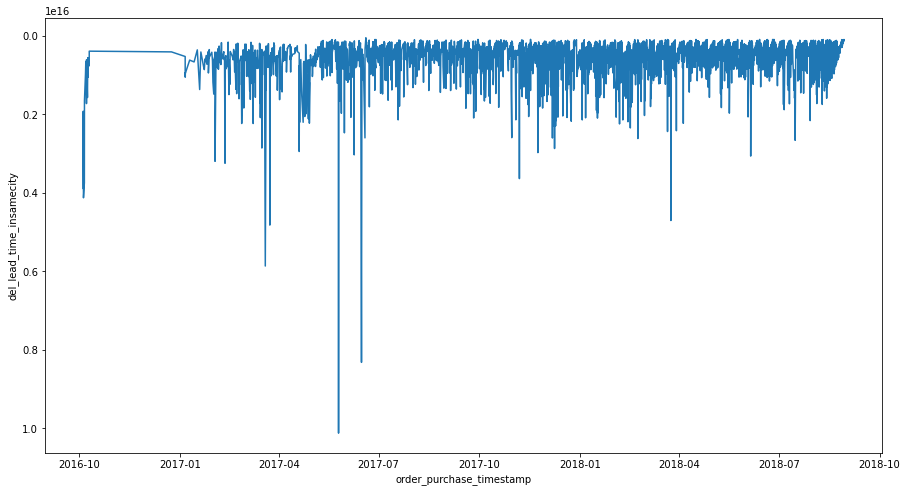

In [280]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_same_city, x="order_purchase_timestamp", y="del_lead_time_insamecity")

<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='esti_lead_time_insamecity'>

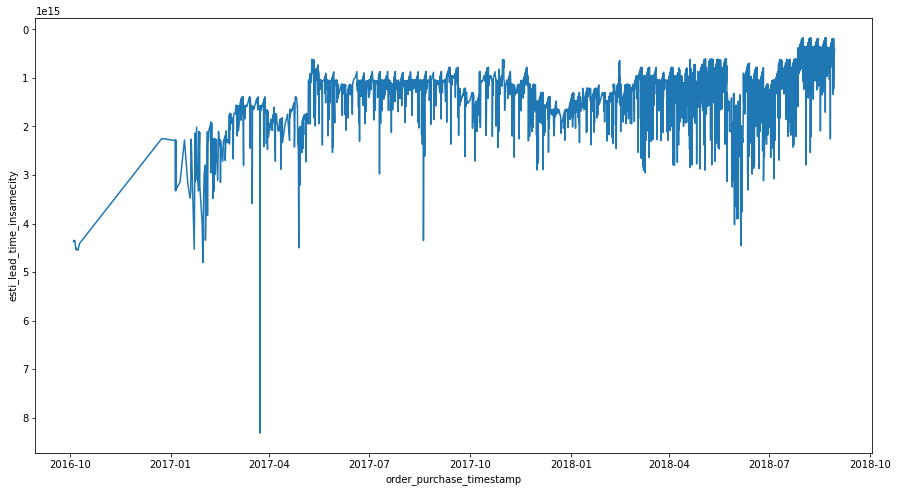

In [283]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_same_city, x="order_purchase_timestamp", y="esti_lead_time_insamecity")

<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='gap_esti_real_insamecity'>

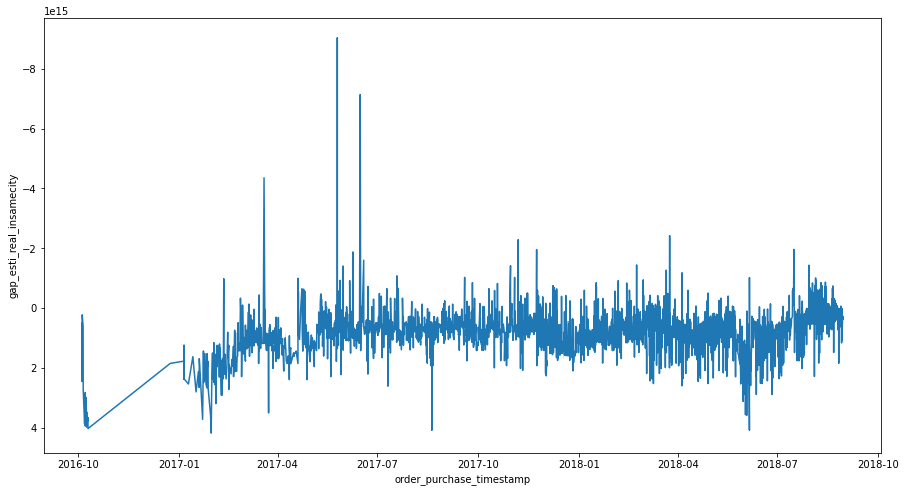

In [284]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_same_city, x="order_purchase_timestamp", y="gap_esti_real_insamecity")

<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='gap_limit_real_insamecity'>

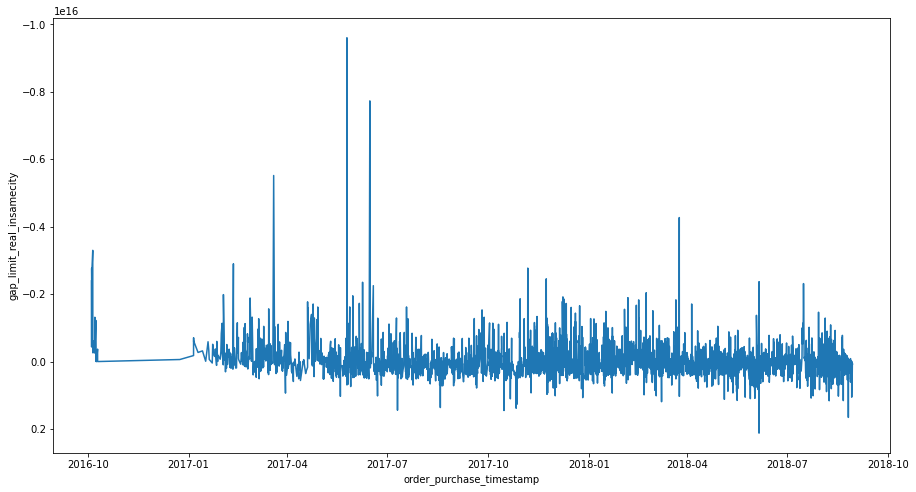

In [285]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_same_city, x="order_purchase_timestamp", y="gap_limit_real_insamecity")

<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='gap_limit_esti_insamecity'>

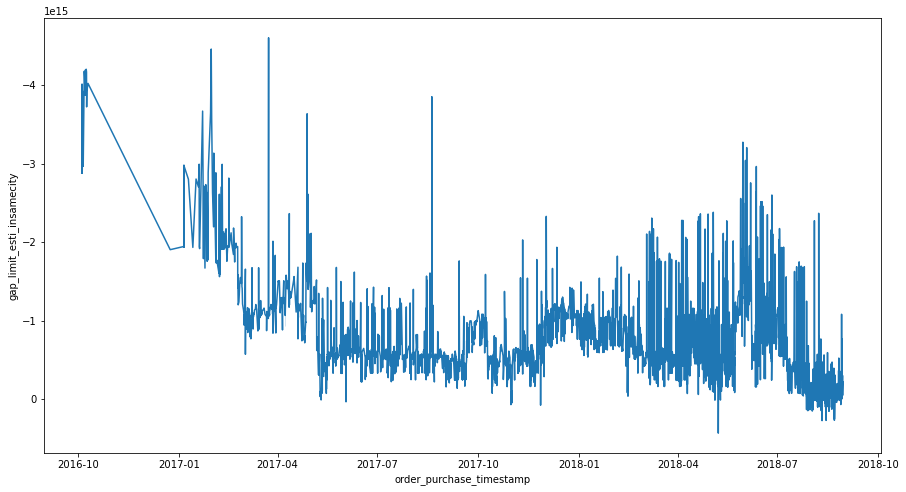

In [286]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_same_city, x="order_purchase_timestamp", y="gap_limit_esti_insamecity")

# 이 뒤는 버립니다.

In [ ]:
# 스케일 값이 달라지게, 평균에 비해 얼마나 되는지 
df.select_dtypes(exclude='object') / df.select_dtypes(exclude='object').mean() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.765483,1.466605,1.587171,1.244384,1.179629,0.770807,0.920931
1,0.637902,1.466605,1.809479,1.579410,1.243257,0.738690,0.920931
2,0.765483,1.466605,1.644041,1.435827,1.156737,0.706573,0.920931
3,0.680429,1.466605,1.571661,1.435827,1.155727,0.770807,0.920931
4,0.722956,1.466605,1.561322,1.340105,1.161113,0.674457,0.920931
...,...,...,...,...,...,...,...
393,1.148224,0.733303,0.723791,0.823208,0.939260,1.002050,1.078805
394,1.871180,0.733303,0.501484,0.497753,0.717069,1.580155,1.078805
395,1.360858,0.733303,0.697942,0.804063,0.772617,0.745114,1.078805
396,1.190751,0.733303,0.620393,0.756202,0.883712,1.194752,1.078805


In [ ]:
# 임의의 노말라이징 예시 - 그냥 임의임
# 사이킥 런은 이런것들을 다 기능으로 제공하고 있다
df_norm = df.select_dtypes(exclude='object') / df.select_dtypes(exclude='object').mean() 

In [275]:
sns.catplot(data=same_city, kind="violin")

ValueError: min() arg is an empty sequence

**표준화(standardization) :**

데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환

(Z-score 표준화) : (측정값 - 평균) / 표준편차

**정규화(normalization) :**

데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환

(측정값 - 최소값) / (최대값 - 최소값)

In [ ]:
# 진짜 표준화

df_num =  df.select_dtypes(exclude='object')
df_norm1 = (df_num - df_num.mean()) / df_num.std() # 표준편차로 나누어줌

# 예시로 논술시험같은 평가 기준이 좀 다를 수 있는 사람들의 채점은 이런 표준화 과정을 거칩니다. 스케일을 맞추는 방법.

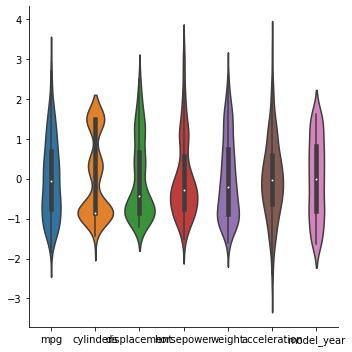

In [ ]:
sns.catplot(data=df_norm1, kind="violin")

**어떤 데이터는 표준화가 좋고 어떤 데이터는 정규화가 좋은지는 도메인에 따라 달라지게 된다.**

정규화는 0~1로 바꾸고 표준화는 비슷한 레벨로 맞춰서.